This notebook contains  sample code for linear regression and various extensions to linear regression

# Unit 05 Linear Regression Extensions
`
By   : Dr. James G. Shanahan
EMAIL: James.Shanahan AT Gmail.com`

## Learning objectives
1. Compute gradient updates by hand [prep for midterm]
* Review Simple Linear regression learning algorithms
  * via gradient descent (and brute force)
  * Closed form (via Normal Equation)
* Learn how batchsize matters in gradient descent 
  * Batch gradient descent
  * Stochastic Gradient descent (SGD)
  * Minibatch Gradient descent
* Understand how polynomial regression extends linear regression
* See how Bias-Variance can be used to analyze underfitting and overfitting a model 
  * E.g.,  see how simple regression can be extended to the level that it overfits
* plot objective functions for 2D problems (2 input features)
  * MSE
  * L1 Loss-based objective function
  * L2 Loss-based objective function
  * MSE + L1 Loss-based objective function
  * MSE + L2 Loss-based objective function
  
* Feature selection as a means to address Bias-Variance
  * Feature selection via regularization (LASSO vs Ridge Regression)
  * Sequential feature selection
  * Feature importance via ensembles of decision trees

## Stretch Tasks
TASK: (Search the work TASK below): plot Lasso heatmaps for Boston dataset 


# Quizzes (something like this might appear in the midterm!):

Linear Regression model prediction (vectorized form)**

$
\hat{y} = h_{\mathbf{\theta}}(\mathbf{x}) = \mathbf{\theta}^T \cdot \mathbf{x}
$


** MSE cost function for a Linear Regression model**

$
\text{MSE}(\mathbf{X}, h_{\mathbf{\theta}}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{(\mathbf{\theta}^T \cdot \mathbf{x}^{(i)} - y^{(i)})^2}
$


** Normal Equation**

$
\hat{\mathbf{\theta}} = (\mathbf{X}^T \cdot \mathbf{X})^{-1} \cdot \mathbf{X}^T \cdot \mathbf{y}
$


** Partial derivatives notation :**

$\frac{\partial}{\partial \theta_j} \text{MSE}(\mathbf{\theta})$


** Partial derivatives of the cost function**

$
\dfrac{\partial}{\partial \theta_j} \text{MSE}(\mathbf{\theta}) = \dfrac{2}{m}\sum\limits_{i=1}^{m}(\mathbf{\theta}^T \cdot \mathbf{x}^{(i)} - y^{(i)})\, x_j^{(i)}
$


**Gradient vector of the cost function**

$
\nabla_{\mathbf{\theta}}\, \text{MSE}(\mathbf{\theta}) =
\begin{pmatrix}
 \frac{\partial}{\partial \theta_0} \text{MSE}(\mathbf{\theta}) \\
 \frac{\partial}{\partial \theta_1} \text{MSE}(\mathbf{\theta}) \\
 \vdots \\
 \frac{\partial}{\partial \theta_n} \text{MSE}(\mathbf{\theta})
\end{pmatrix}
 = \dfrac{2}{m} \mathbf{X}^T \cdot (\mathbf{X} \cdot \mathbf{\theta} - \mathbf{y})
$


** Gradient Descent step**

$
\mathbf{\theta}^{(\text{next step})} = \mathbf{\theta} - \eta \nabla_{\mathbf{\theta}}\, \text{MSE}(\mathbf{\theta})
$


## Vanilla Linear regression via gradient descent

### Worked out example (but try by yourself for practice)

The following is a review of the gradient update for NON regularized linear regression. Given the current weight vector (1, 0, 1) for a linear regression model, and a single training example (2, 3) [HINT: not augmented], and a learning rate of 0.1, calculate the new weight vector after doing a single gradient update step. Report your response to 2 decimal places. The corresponding output value for this training example is 6.

The response and how to calculate this is depicted below:

<img src="attachment:image.png" alt="Drawing" style="width: =700px;"/>

For completeness the response is [one point two, zero.four, one point six]. How did you do?!


### Sample Quiz: Single example update via GD for MSE loss function
Given the current weight vector (2, -1, 4, 8) for a linear regression model, and a single training example (1, 5, 1, 2) [in augmented form], and a learning rate of 0.01, calculate the new weight vector after doing a single gradient descent step. Report your response to 2 decimal places. The corresponding output value for this training example is 6. 

For completeness the new weight vector is [ #.89, ##.55,  3.89,  7.78]. How did you do?!

`where # = 1 and ## = -1`

### Now do this gradient update in code!

In python code (and please be pythonic and vectorize stuff!) perform the following gradient update task.

Given the current weight vector (2, -1, 4, 8) for a linear regression model, and a single training example (1, 5, 1, 2) [in augmented form], and a learning rate, $\eta$ of 0.01 , calculate the new weight vector after doing a single gradient descent step. Report your response to 2 decimal places. The corresponding output value for this training example is 6. 

Trust but verify: does your coded solution equal your hand calculated solution from above?



In [45]:
import numpy as np
X=np.array([1, 5, 1, 2])
w=np.array([2,-1, 4, 8])
eta = .01
y = 6
w=w-eta*np.dot((np.dot(X,w)-y),X)

In [46]:
w

array([ 1.89, -1.55,  3.89,  7.78])

## LASSO Regression update via GD using one example



** Lasso Regression cost function**

$$
J(\mathbf{\theta}) = \text{MSE}(\mathbf{\theta}) + \alpha \sum\limits_{i=1}^{n}\left| \theta_i \right|
$$

**Lasso Regression subgradient vector**

$$
g(\mathbf{\theta}, J) = \nabla_{\mathbf{\theta}}\, \text{MSE}(\mathbf{\theta}) + \alpha
\begin{pmatrix}
  \operatorname{sign}(\theta_1) \\
  \operatorname{sign}(\theta_2) \\
  \vdots \\
  \operatorname{sign}(\theta_n) \\
\end{pmatrix} \quad \text{where } \operatorname{sign}(\theta_i) =
\begin{cases}
-1 & \text{if } \theta_i < 0 \\
0 & \text{if } \theta_i = 0 \\
+1 & \text{if } \theta_i > 0
\end{cases}
$$


** Gradient Descent step**

$
\mathbf{\theta}^{(\text{next step})} = \mathbf{\theta} - \eta \nabla_{\mathbf{\theta}}\, \text{MSE}(\mathbf{\theta})
$


### Quiz:  Gradient Descent for LASSO Linear Regression
Given the current weight vector (2, -1, 4, 8) for a linear regression model, and a single training example [(5, 1, 2)] (HINT not augmented), with a corresponind target value of [10], and a learning rate, $\eta$, of 0.1, calculate the new weight vector after doing a single gradient step when using an objective function with L1 Regularization with MSE terms. Report your responses to 2 decimal places. Let $ \alpha =0.3$ be the mixing coefficient in the LASSO regression loss function.
Note the the first term in the weight vector here is for the bias term. HINT: dont forget to augment your data!

<img src="attachment:image.png" width=700>

<img src="attachment:image.png" alt="Drawing" style="width: =700px;"/>


### Quiz:  Gradient Descent for Ridge Linear Regression
Given the current weight vector (1, 1, 1, 1) for a linear regression model, and a single training example [(5, 1, 2)] (HINT not augmented), with a corresponding target value of [10], and a learning rate of 0.1, calculate the new weight vector after doing a single gradient step using when using an objective function containing L2 Regularization with MSE terms. Report your responses to 2 decimal places. Let $ \alpha =0.3$ be the mixing coefficient in the Ridge regression loss function.
Note the the first term in the weight vector here is for the bias term. HINT: dont forget to augment your data!

### Now do this LASSO gradient update in code!

In python code (and please be pythonic and vectorize stuff!) perform the following gradient update task.

Given the current weight vector (1, 1, 1, 1) for a linear regression model, and a single training example [(5, 1, 2)] (HINT not augmented), with a corresponding target value of [10], and a learning rate of 0.1, calculate the new weight vector after doing a single gradient step using when using an objective function containing L2 Regularization with MSE terms. Report your responses to 2 decimal places. Let  $α=0.3$  be the mixing coefficient in the Ridge regression loss function. Note the the first term in the weight vector here is for the bias term. HINT: dont forget to augment your data!

Trust but verify: does your coded solution equal your hand verified calculated solution?



In [1]:
import numpy as np
X=np.array([[1, 5, 1, 2],[1,1,0,1]])
w=np.array([2,-1,4,8])
eta = 0.01
y = [10,1]
alpha = .1
w - eta * (np.dot((np.dot(X,w)-y),X) + np.append(0,alpha*np.sign(w[1:]))) 

#error = 17 -10 = 7
# ......  + np.append(0,alpha*np.sign(w[1:]))
# why the 0? Did I just screw up here? (HINT: no)

array([ 1.85 , -1.429,  3.929,  7.779])

In [44]:
path_parens = []
change_parens = []
path = []
change_parens = []
n_iterations = 1000          

for n in range(n_iterations):
    update = eta * (np.dot((np.dot(X,w)-y),X) + np.append(0,alpha*np.sign(w[1:]))) 
    w = w - update
    change_parens.append(np.sum(update))
    path_parens.append(w)
    
for n in range(n_iterations):
    update = eta * np.dot((np.dot(X,w)-y),X) + np.append(0,alpha*np.sign(w[1:]))
    w = w - update
    change.append(np.sum(update))
    path.append(w)


In [48]:
change[-10:-1]

[0.15370086357394974,
 -0.070079062974143347,
 -0.044009547000249283,
 -0.050430437174854098,
 0.16914940299620737,
 -0.059611654223084926,
 -0.060874485256506794,
 -0.037845079941318555,
 0.1537008635739498]

In [47]:
change_parens[-10:-1]

[-0.00043255331387311491,
 0.0015010734113157453,
 -0.0027245785454494513,
 0.0017242380501929187,
 -0.00057514171890154706,
 -0.00035563265684925276,
 0.0015526112350901754,
 -0.0006900164615255231,
 -0.00043255331387311491]

###  LASSO Regression update via GD using a Training dataset (multiple examples)

Given the current weight vector (2, -1, 4, 8) for a linear regression model, and multiple training examples, where the inputs are [ (5, 1, 2), (1, 0,1)], with the corresponding target values are [10, 1], and given a learning rate of 0.01, calculate the new weight vector after doing a single gradient step when using an objective function consisting of the  L1 Regularization and MSE terms. Report your response to 2 decimal places. Let $ \alpha =0.1$ as the mixing coefficient in the LASSO regression loss function.
Note the the first term in the weight vector here is for the bias term. 

### Multiple example update via GD for L2 linear regression 
Given the current weight vector (2, -1, 4, 8) for a linear regression model, and multiple training examples, where the inputs are [ (5, 1, 2), (1, 0,1)], with the corresponding target values are [10, 1], and given a learning rate of 0.01, calculate the new weight vector after doing a single gradient step when using an objective function consisting of the  L2 Regularization and MSE terms. Report your response to 2 decimal places. Let $ \alpha =0.1$ as the mixing coefficient in the ridge regression loss function.


# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [3]:
# to support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# common imports
import numpy as np
import numpy.random as rnd
import os

# to make this notebook's output stable across runs
rnd.seed(42)

# to plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.grid'] = "on"

# to save figures
def save_fig(fig_id, tight_layout=True):
    if not os.path.exists("images"):
        os.mkdir("images")
    path = os.path.join("images", fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Linear regression using the Normal Equation

## Generate some data

Generate data using the following equation:


$$    y = 4 + 3 * X + rnd.randn(100, 1) $$

In [4]:
import numpy as np
import numpy.random as rnd
X = 2 * rnd.rand(100, 1)
y = 4 + 3 * X + rnd.randn(100, 1)

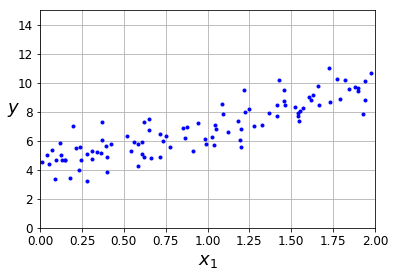

In [5]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

## Closed form solution to Linear regression using the Normal Equation

In [6]:
import numpy.linalg as LA

X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = LA.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

### The learnt model: intercept and coefficient

In [7]:
theta_best # The learnt simple linear regression model: intercept and coefficient

array([[ 4.21509616],
       [ 2.77011339]])

### Predict in vectorized form using the learnt linear regression model
Predict for two test cases:  [0], [2]. We will use these later to plot the learnt linear regression model.

In [8]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.21509616],
       [ 9.75532293]])

### Plot the learnt linear regression mode
 Plot the learnt linear regression model using the two test cases (and interpolate/extrapolate the rest).

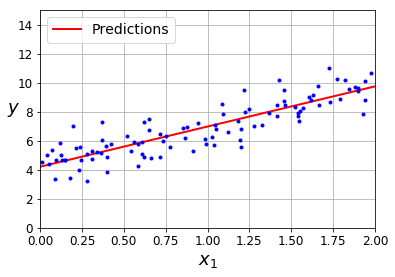

In [9]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
# save_fig("linear_model_predictions")
plt.show()

## Learn a linear regression model using SKLearn

Learn a linear regression model using SKLearn's LinearRegression Class:

   * `sklearn.linear_model.LinearRegression`

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("Model intercept, slope:",lin_reg.intercept_[0],", ", lin_reg.coef_[0][0])
#note this is the same as what got using the closed form approach above (with very small differences due to rounding)
# array([[ 4.21509616],
#       [ 2.77011339]])

Model intercept, slope: 4.21509615755 ,  2.77011338644


### Predict using the learnt SKLearn linear regression model

In [11]:
lin_reg.predict(X_new)
#note these predictions are the same as what got using the closed form approach above 
# (with very small differences due to rounding; not here!)
#array([[ 4.21509616],
#       [ 9.75532293]])

array([[ 4.21509616],
       [ 9.75532293]])

# Homegrown Linear regression using diff gradient descent flavors

## Vanilla Linear regression via GD with different learning rates $\eta$

Let do learn linear regression models via gradient descent (with no regularization). We will explore different learning rates $\eta$ and their progress during the first 10 iterations of GD

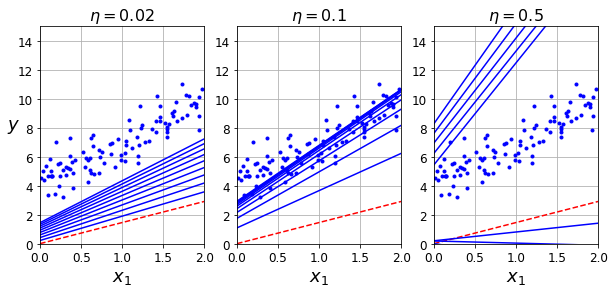

In [12]:
import numpy as np
import numpy.random as rnd
#generate a dataset
rnd.seed(42)
X = 2 * rnd.rand(100, 1)
y = 4 + 3 * X + rnd.randn(100, 1)

theta_path_bgd = []
#eta, the learning rate
def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)


theta = rnd.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

In [13]:
theta_path_bgd[-1]

array([[ 4.21509616],
       [ 2.77011339]])

## Stochastic Gradient Descent

Do gradient descent learning one example at a time (i.e., update the weight one training example at a time). This is known as Stochastic Gradient Descent

Pick one example at the time

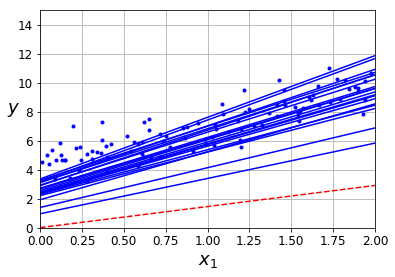

In [14]:
theta_path_sgd = []
rnd.seed(42)
#generate a dataset
X = 2 * rnd.rand(100, 1)
y = 4 + 3 * X + rnd.randn(100, 1)

n_iterations = 50
t0, t1 = 5, 50  # learning schedule hyperparameters


theta = rnd.randn(2,1)  # random initialization

def learning_schedule(t):
    return t0 / (t + t1)

m = len(X_b)

for epoch in range(n_iterations):  #50 epochs
    for i in range(m):             #100 examples
        if epoch == 0 and i < 20:  #plot the updated linear model every 20 iterations
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)  #plot intermediate line using test X[[0], [2]]
        random_index = rnd.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
# save_fig("sgd_plot")
plt.show()

### The learning model is similar to the SKLearn solution. Phew!

In [15]:
# print final theta
theta

array([[ 4.19000137],
       [ 2.73381258]])

In [16]:
# compare to sklearn model
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

/Users/jamie/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=50, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [17]:
sgd_reg.intercept_, sgd_reg.coef_

(array([ 4.21188946]), array([ 2.77022693]))

## Mini-batch gradient descent

In [18]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

rnd.seed(42)
theta = rnd.randn(2,1)  # random initialization

t0, t1 = 10, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = rnd.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [19]:
theta

array([[ 4.25214635],
       [ 2.7896408 ]])

## Compare the paths taken by GD, SGG and MB-GD

In [20]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

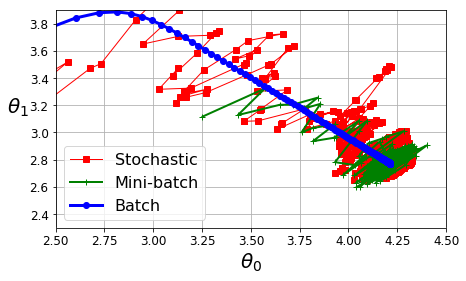

In [21]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="lower left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
# save_fig("gradient_descent_paths_plot")
plt.show()

# Polynomial regression

In statistics, polynomial regression is a form of regression analysis in which the relationship between the independent variable $x$ and the dependent variable $y$ is modelled as an $n^th$ degree polynomial in x. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted $E(y |x)$, and has been used to describe nonlinear phenomena such as the growth rate of tissues, the distribution of carbon isotopes in lake sediments, and the progression of disease epidemics. 

Although polynomial regression fits a nonlinear model to the data, as a statistical estimation problem it is linear, in the sense that the regression function E(y | x) is linear in the unknown parameters that are estimated from the data. For this reason, polynomial regression is considered to be a special case of multiple linear regression.

In general, we can model the expected value of y as an nth degree polynomial, yielding the general polynomial regression model

$${\displaystyle y=\beta _{0}+\beta _{1}x+\beta _{2}x^{2}+\beta _{3}x^{3}+\cdots +\beta _{n}x^{n}+\varepsilon .\,} $$
For more details on polynomial regression see [here](https://en.wikipedia.org/wiki/Polynomial_regression).

## Generate some nonlinear data

In [4]:
import numpy as np
import numpy.random as rnd

rnd.seed(42)
m = 100
X = 6 * rnd.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + rnd.randn(m, 1)

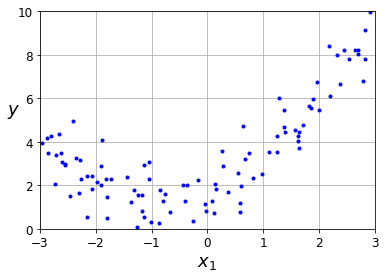

In [5]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
# save_fig("quadratic_data_plot")
plt.show()

## Derive some polynomial features of x

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print("x",X[0])
#print("[x, x^2]: ",X_poly[0])
print('[x, x\u00b2]=',X_poly[0])

x [-0.75275929]
[x, x²]= [-0.75275929  0.56664654]


### Polynomial features upto degree $n$

In [7]:
from sklearn.preprocessing import PolynomialFeatures
poly_features5 = PolynomialFeatures(degree=5, include_bias=False)
X_poly5 = poly_features5.fit_transform(X)
print("x",X[0])
#print("[x, x^2]: ",X_poly[0])
print('[x, x\u00b2, x\u00b3, .....]=',X_poly5[0])

x [-0.75275929]
[x, x², x³, .....]= [-0.75275929  0.56664654 -0.42654845  0.32108831 -0.2417022 ]


In [8]:
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
import pandas as pd
lin_reg = LinearRegression()

df = pd.DataFrame(np.c_[y, np.array(X_poly)],columns=["Y", "X","XP2"])
df.head()

Y         X       XP2
0  1.617611 -0.752759  0.566647
1  8.061859  2.704286  7.313162
2  4.452506  1.391964  1.937563
3  0.779585  0.591951  0.350406
4  1.846257 -2.063888  4.259634

## Learn a polynomial regression model using linear regression

Compare two different libraries to learn linear regression

* use SKLearn to learn the polynomial regression model
* use sm package to learn the polynomial regression model to get nice diagnostics on our learnt model 


In [9]:
lin_reg.fit(X_poly, y)  #use SKLearn to learn the polynomial regression model

#https://medium.com/@dhwajraj/learning-python-regression-analysis-part-9-tests-and-validity-for-regression-models-78dcd5cde3a1
#use sm package to learn the polynomial regression model 
# to get nice diagnostics on our learnt model
lm = sm.ols(formula='Y~X+XP2',data =df).fit()
Y_ols_pred=lm.predict(df[["X", "XP2"]]) #make predictions x and x^2
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     280.3
Date:                Wed, 13 Jun 2018   Prob (F-statistic):           4.85e-41
Time:                        21:21:06   Log-Likelihood:                -129.29
No. Observations:                 100   AIC:                             264.6
Df Residuals:                      97   BIC:                             272.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7813      0.139     12.782      0.000       1.505       2.058
X              0.9337      0.051     18.420      0.000       0.833       1.034
XP2            0.5646      0.034     16.748      0.000       0.498       0.631
==============================================================================
Omnibus:                        1.694   Durbin-Watson:                   2.295
Prob(Omnibus):                  0.429   Jarque-Bera (JB):                1.283
Skew:                           0.269   Prob(JB):                        0.526
Kurtosis:                       3.135   Cond. No.                         6.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
lin_reg.intercept_, lin_reg.coef_

(array([ 1.78134581]), array([[ 0.93366893,  0.56456263]]))

## Plot the learnt polynomial regression model

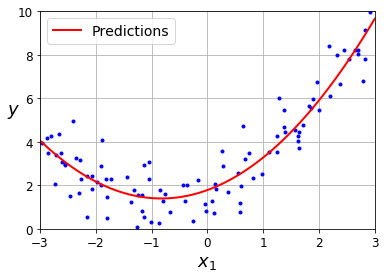

In [11]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
# save_fig("quadratic_predictions_plot")
plt.show()

## Put polynomial regression in a pipeline and examine higher order polynomial regression

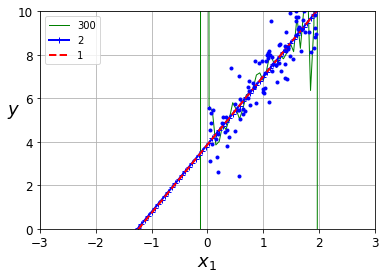

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X = 2 * rnd.rand(100, 1)
y = 4 + 3  * X + rnd.randn(100, 1)

# Put polynomial regression in a pipeline and examine higher order polynomial regression
# degrees of:  300, 2, 1
for style, width, degree in (("g-", 1, 300), ("b-+", 2, 2), ("r--", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline((
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ))
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
# save_fig("high_degree_polynomials_plot")
plt.show()

## How does training set size impact training
### Linear regression with different training set sizes

What is the impact of training size on the learnt linear regression model?

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Training set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)



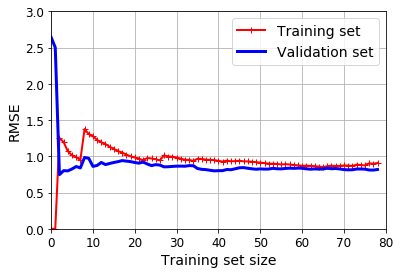

In [32]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown
#save_fig("underfitting_learning_curves_plot")   # not shown
plt.show()                                      # not shown

### Polynomial Regression with deg=10;   different training set sizes

What is the impact of training size on the learnt POLYNOMIAL regression model?

Saving figure learning_curves_plot


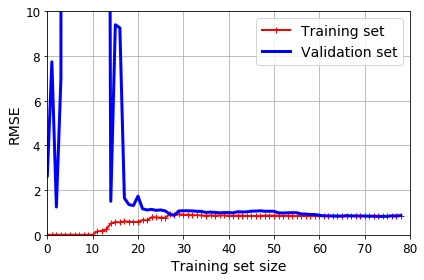

In [33]:
from sklearn.pipeline import Pipeline

## Polynomial=10 LR with different training set size
polynomial_regression = Pipeline((
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ))

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 10])           # not shown
save_fig("learning_curves_plot")  # not shown
plt.show()                        # not shown

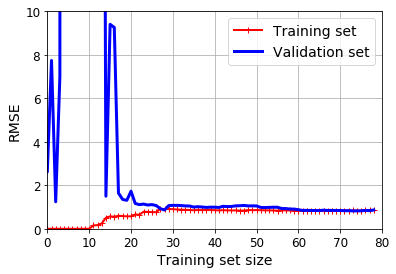

In [34]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("sgd_reg", LinearRegression()),
    ))

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 10])
# save_fig("learning_curves_plot")
plt.show()

# Regularized linear regression models


## Ridge Linear Regression with polynomial features with different mixing coefficients for the penalty term 

Compare linear regression $\alpha =0$ versus Ridge regression when  learning linear regression with degree-10 polynomial features inclusive (x, x^2, ...x^10).

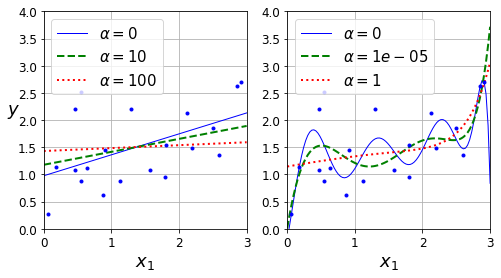

In [35]:
from sklearn.linear_model import Ridge

rnd.seed(42)
m = 20
X = 3 * rnd.rand(m, 1)
y = 1 + 0.5 * X + rnd.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline((
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ))
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100))
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1))

# save_fig("ridge_regression_plot")
plt.show()

### Explore different optimization algorithms to learn a linear regression model with the Ridge objective function

In [36]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[ 1.55071465]])

In [37]:
sgd_reg = SGDRegressor(penalty="l2", random_state=42, max_iter=1000)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([ 1.55331848])

In [38]:
ridge_reg = Ridge(alpha=1, solver="sag")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[ 1.55074549]])

## Lasso Linear Regression with polynomial features with different mixing coefficients for the penalty term 

Compare linear regression $\alpha =0$ versus Ridge regression when  learning linear regression with degree-10 polynomial features inclusive (x, x^2, ...x^10).

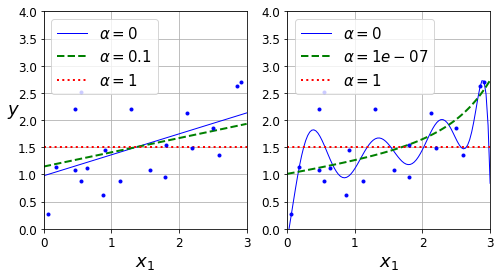

In [39]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1))
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1)

# save_fig("lasso_regression_plot")
plt.show()

In [40]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([ 1.53788174])

## ElasticNet (hybrid regularization) linear regression

** Elastic Net cost function**

$
J(\mathbf{\theta}) = \text{MSE}(\mathbf{\theta}) + r \alpha \sum\limits_{i=1}^{m}\left| \theta_i \right| + \dfrac{1 - r}{2} \alpha \sum\limits_{i=1}^{m}{\theta_i^2}
$


In [41]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([ 1.54333232])

In [42]:
# to support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# common imports
import numpy as np
import numpy.random as rnd
import os
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# to make this notebook's output stable across runs
rnd.seed(42)

m = 100
X = 6 * rnd.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + rnd.randn(m, 1)

#X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)
rnd.rand(5, 3)

array([[ 0.7948113 ,  0.50263709,  0.57690388],
       [ 0.49251769,  0.19524299,  0.72245212],
       [ 0.28077236,  0.02431597,  0.6454723 ],
       [ 0.17711068,  0.94045858,  0.95392858],
       [ 0.91486439,  0.3701587 ,  0.01545662]])

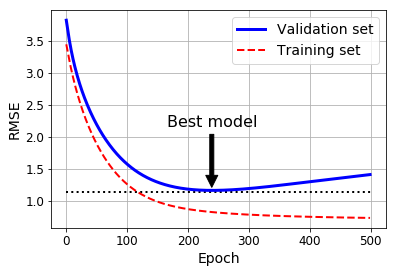

In [43]:
rnd.seed(42)
m = 100
X = 6 * rnd.rand(m, 1) - 3 
y = 2 + X + 0.5 * X**2 + rnd.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline((
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)), 
        ("std_scaler", StandardScaler()),
    ))

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train_predict, y_train))
    val_errors.append(mean_squared_error(y_val_predict, y_val))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
# save_fig("early_stopping_plot")
plt.show()

In [44]:
from sklearn.base import clone
sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005,
                       random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

best_epoch, best_model

(239, SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
        fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
        loss='squared_loss', max_iter=1, n_iter=None, penalty=None,
        power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
        warm_start=True))

# Visualizing in 3D the MSE and regularized MSE loss functions 

## Plot a 2D problem and its corresponding linear regression model
An example dataset with 2 input features that is plotted in 3D along with the corresponding learnt linear regrssion model


## Plot MSE + Penalty Surfaces

### Setup training data and mesh grids for plotting LASSO/Ridge objective functions
In this section we learn how to plot the MSE + Penalty Surfaces a for linear regression model. To illustrate this we use a  small training set consisting of 3 training examples.

**NOTE this model has no BIAS term (big asssumption that allows us to visualize LASSO and Ridge error surfaces in 3D **
* as such both theta[0] and theta[1] can participate in regularization 
* Recall that the bias term does not participate in model penalty term (but we dont have one here!)

We use a very small training input (Xr), and output (yr) dataset for illustrative purposes
<pre>Xr = array([[-1. ,  1. ],
       [-0.3, -1. ],
       [ 1. ,  0.1]])
</pre>
<pre>yr= array([[-1.5 ],
       [-1.1 ],
       [ 2.05]])</pre>
       
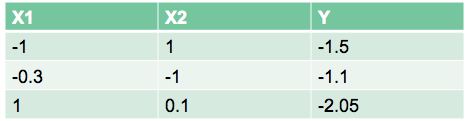

### Lasso Regression cost function

$$
J(\mathbf{\theta}) = \text{MSE}(\mathbf{\theta}) + \alpha \sum\limits_{i=1}^{n}\left| \theta_i \right|
$$
       
Steps in plotting the MSE objective function; LASSO objective function; RIDGE Objective function:
1. Set up the mesh of theta
* Precalculate and cache objective function terms: MSE; penalty
  * the MSE loss for each combination thetas in T (explored in the meshplot)
  * precalculate and cache the Norms of the thetas grid points (i.e., of the linear regression coefficients)
  * NOTE: these cached values will be used to calculate the value of the objective function for different hyperparameters $\alpha$ setting
* Locate the global minimum of the MSE objective function using the cached MSE grid



### An example dataset with 2 input features that is plotted in 3D along with the corresponding learnt linear regrssion model

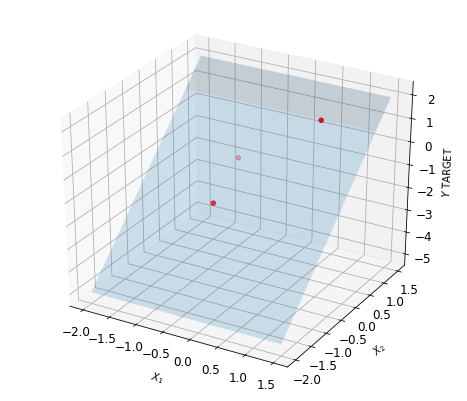

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

Xr = np.array([[-1., 1.], [-0.3,-1.], [1.,0.1]])
yr= np.array([[-1.5 ],[-1.1 ],[ 2.05]])

# create a grid covering the scope of the data
x1,x2 = np.meshgrid(np.arange(-2, 2, 0.5), np.arange(-2, 2, 0.5))
Xs = list(zip(x1[0],x2[0]))

# model a two-feature regression plane
# no bias term!
lr = LinearRegression(fit_intercept=False)

lr.fit(Xr,yr)
y_pred = lr.predict(Xs)


fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111, projection='3d')
#plot regression plane
ax.plot_surface(x1, x2, y_pred, rstride=1, cstride=1, alpha=0.2)

ax.scatter(Xr[:,0],  Xr[:,1], yr.ravel(), c='r', marker='o')
#fig.title('Training dataset with 2 inputs($X_1, X_2$) and $y$', fontsize=16)
ax.set_xlabel('$X_1$', fontsize=10, labelpad=10)
ax.set_ylabel('$X_2$', fontsize=10, labelpad=10)
ax.set_zlabel('$Y$ TARGET', fontsize=10)

plt.show()

### Plotting two features from the Boston dataset with the corresponding regression model

In this section we learn how to plot the  linear regression model in 3D. To do this we will not use a bias term.



Intercept and coefficients of the two-feature regression plane: 22.5328063241 [-2.08914392 -3.59947486]


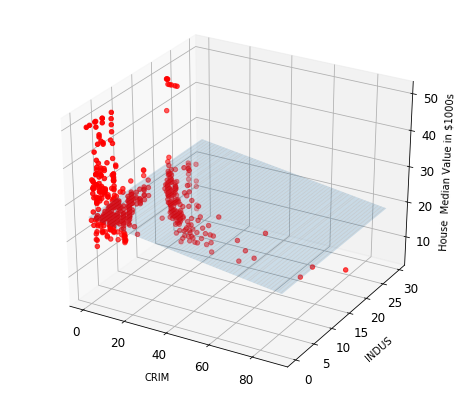

In [44]:
#%pdb  #start the debugger in the backgound; it will launch whenever an exception is thrown
#from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
X_2feat = pd.DataFrame(boston.data, columns=boston.feature_names)[['CRIM','INDUS']]
y = boston.target

fig = plt.figure(figsize=(8,7))
ax = fig.gca(projection='3d')

# create a grid covering the scope of the data
x1,x2 = np.meshgrid(np.arange(-0, 90, 0.5), np.arange(0, 30, 0.5))
Xs = list(zip(x1[0],x2[0]))

# model a two-feature regression plane
sc = StandardScaler()
X_2feat_std = sc.fit_transform(X_2feat)
lr = LinearRegression(fit_intercept=True) # gives better results; could fit_intercept=False 
lr.fit(X_2feat_std,y)
Xs_std = sc.fit_transform(Xs) #Standardize the grid for prediction purposes
y_pred = lr.predict(Xs_std).reshape(1,-1)
print('Intercept and coefficients of the two-feature regression plane:', lr.intercept_, lr.coef_)

#plot regression plane
ax.plot_surface(x1, x2, y_pred, rstride=1, cstride=1, alpha=0.2)

#plot scatter plot
ax.scatter(X_2feat.values[:,0], X_2feat.values[:,1], y, c='r', marker='o')
ax.set_xlabel('CRIM', fontsize=10, labelpad=10)
ax.set_ylabel('INDUS', fontsize=10, labelpad=10)
ax.set_zlabel('House  Median Value in $1000s', fontsize=10)
plt.show()


#### Find $\theta_1, \theta_2$ via SKLearn Linear Regression

Find $\theta_1, \theta_2$ via SKLearn Linear Regression so we can figure how to set up the contour plots later

### Plot LASSO versus Ridge objective functions

In [34]:
# to plot pretty figures
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt

#  l1 versus l2 mixing coefficient

# Do gradient descent for either LASSO or Ridge regression
#     l1 and l2 play the role of alpha the mixing coefficient for the penalty term
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.1, n_iterations = 50):
    path = [theta]
    for iteration in range(n_iterations):
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + 2 * l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)


def plotMSE_Objective_functions(t1a, t1b, t2a, t2b, Xr, yr, t_init):
    # ignore bias term and focuse on input feature 1 and input feature 2, x1 and x2
    t1s = np.linspace(t1a, t1b, 500)
    t2s = np.linspace(t2a, t2b, 500)
    t1, t2 = np.meshgrid(t1s, t2s)  # domain of theta1 and theta2, the linear regression parameters
    # np.c_[t1.ravel(), t2.ravel()] .... zip grid t1 and t2 components into pairs of theta1 and theta2
    T = np.c_[t1.ravel(), t2.ravel()]  #pairs of thetas  


    # precalculate and cache the MSE loss for each combination thetas in T (explored in the meshplot)
    J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

    # precalculate and cache Norms of the thetas grid points (i.e., of the linear regression coefficients)
    # used for plotting the objective function
    N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
    N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

    # locate the global minimum for the MSE objective function which is: (1.99, 0.50)
    t_min_idx = np.unravel_index(np.argmin(J), J.shape)
    t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

    #startT1 = 0.25
    #startT2 = -1
    #t_init = np.array([[startT1], [startT2]])  #initial values for theta [0.25, -1]

    
    #l1 and l2 play the role of alpha the mixing coefficient for the penalty term
    #
    plt.figure(figsize=(12, 8))
    
    for i, N, l1, l2, title in ((0, N1, 0.5, 0, r"Lasso Regression where $\alpha=0.5$, with GD trace"), 
                                (1, N2, 0,  0.1, r"Ridge Regression where $\alpha=0.1$, with GD trace")):
        JR = J + l1 * N1 + l2 * N2**2  #Objective function surface calculated from cache: MSE + Penalty

        tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
        t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

        # levels for the Z dimension (heatmap, and contour plots) which the objective 
        # function (MSE or LASSO or Ridge)
        # where is the levelsJ for a Vanilla linear regression (J)
        levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J) 
        levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
        levelsN=np.linspace(0, np.max(N), 10)  #[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5]

        #learn a Vanilla linear regression (J); 
        path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)  #
        #learn a Regularized linear regression model
        path_JR = bgd_path(t_init, Xr, yr, l1, l2)  #Regularized: either L1 or L2 
        #learn linear regression using the penalty loss term only (i.e., no MSE component); 
        path_N = bgd_path(t_init, Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

        # plot the component terms of penalized linear regression objective function 
        # separately (i.e., plot MSE filled contours, penalty contour) 
        plt.subplot(221 + i * 2)
        plt.grid(True)
        plt.axhline(y=0, color='k')
        plt.axvline(x=0, color='k')
        plt.contourf(t1, t2, J, levels=levelsJ, alpha=0.9)  #filled contours for MSE 
        plt.contour(t1, t2, N, levels=levelsN)              # contours for penalty term
        # plot the gradient paths
        # plot GD path for the MSE term in the linear regression objective.(J);
        plt.plot(path_J[:, 0], path_J[:, 1], "w-o") 
        plt.plot(path_N[:, 0], path_N[:, 1], "y-^") #plot GD path for the penalty loss term only (N);
        plt.plot(t1_min, t2_min, "rs")   #Min
        plt.plot(t_init[0],t_init[1], "bs")  #start of GD search 
        plt.title(r"$\ell_{}$ penalty versus MSE with GD traces".format(i + 1), fontsize=16)
        plt.axis([t1a, t1b, t2a, t2b])
  
        print("Global minimum for MSE(theta1, theta2) is located at ", t1_min, t2_min)
        print("and value is", np.round(J[t_min_idx], 7))
        
        #plot the penalized linear regression objective function (i.e., MSE + Penalty)
        plt.subplot(222 + i * 2)
        plt.grid(True)
        plt.axhline(y=0, color='k')
        plt.axvline(x=0, color='k')
        plt.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
        #plot GD path for Regularized linear regression: either L1 or L2 
        plt.plot(path_JR[:, 0], path_JR[:, 1], "w-o") 
        plt.plot(t1r_min, t2r_min, "rs") #Min
        plt.plot(t_init[0],t_init[1], "bs")  #start of GD search 

        plt.title(title, fontsize=16)
        plt.axis([t1a, t1b, t2a, t2b])     
    
    for subplot in (221, 223):
        plt.subplot(subplot)
        plt.ylabel(r"$\theta_2$", fontsize=20, rotation=0)

    for subplot in (223, 224):
        plt.subplot(subplot)
        plt.xlabel(r"$\theta_1$", fontsize=20)

    plt.show()
    

### use 3 training examples plot the objective MSE/LASSO/RIDGE functions


Global minimum for MSE(theta1, theta2) is located at  1.99799599198 0.502004008016
and value is 7.1e-06
Global minimum for MSE(theta1, theta2) is located at  1.99799599198 0.502004008016
and value is 7.1e-06


/Users/jamie/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


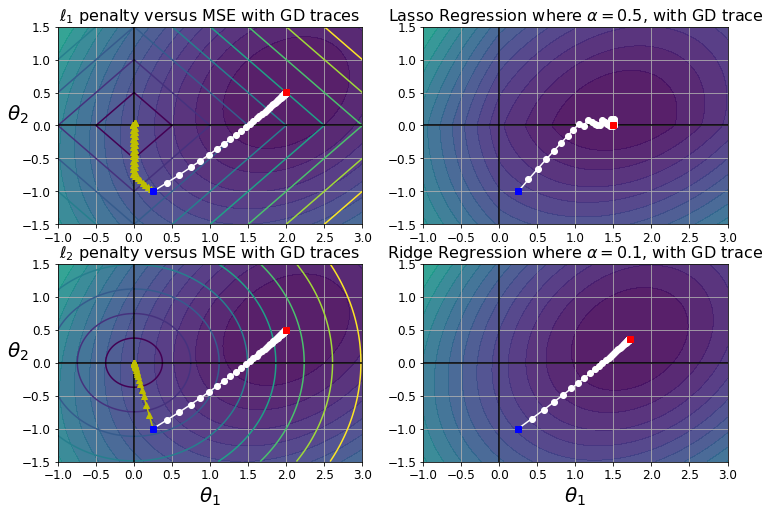

In [35]:
# use 3 training examples plot the objective MSE/LASSO/RIDGE functions

def plotSmall_DataSet():
    t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5
    # Training data
    Xr = np.array([[-1, 1], [-0.3, -1], [1, 0.1]]) # Training data examples
    yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]           # True target
    startT1 = 0.25
    startT2 = -1
    t_init = np.array([[startT1], [startT2]])  #initial values for theta [0.25, -1]

    plotMSE_Objective_functions(t1a, t1b, t2a, t2b, Xr, yr, t_init)

plotSmall_DataSet()

#### Figure Explained: Regularization term versus data (MSE) loss term  VERSUS LASSO VERSUS Ridge

* Top Left figure: 
  * The background heatmap/filled contours (ellipses) represent an unregularized MSE cost function (i.e., when α = 0 for LASSO linear regression) for different values of $\theta_1$ and $\theta_2$.
  * The foreground  diamond shaped contours represent the $\ell_1$ penalty term  (i.e., when $α =\infty $  for LASSO linear regression)   
  * The white circles show the Batch Gradient Descent path with that MSE cost function. It begins at initial values for theta of [0.25, -1] (represented as the blue square) and finishes at the global minimum for the MSE objective function wrtt training set which is located at [2, 0.5] (represented as the red square).
  * the yellow triangles show the Batch Gradient Descent path with that $\ell_1$ penalty cost function. It begins at initial values for theta of [0.25, -1] and finishes at the global minimum for the $\ell_1$ penalty  objective function wrtt training set which is located at [0. 0].
  
  
 * Top Right figure: LASSO Linear regression objective function with GD Trace. 
 * Lower Right figure: Ridge versus  MSE Linear regression objective functions with corresponding  GD Traces. 
 
 * Lower Right figure: Ridge Linear regression objective function with GD Trace. 


#### Take your time and understand the above plots (It is like trying to understand Picasso's Guernica)

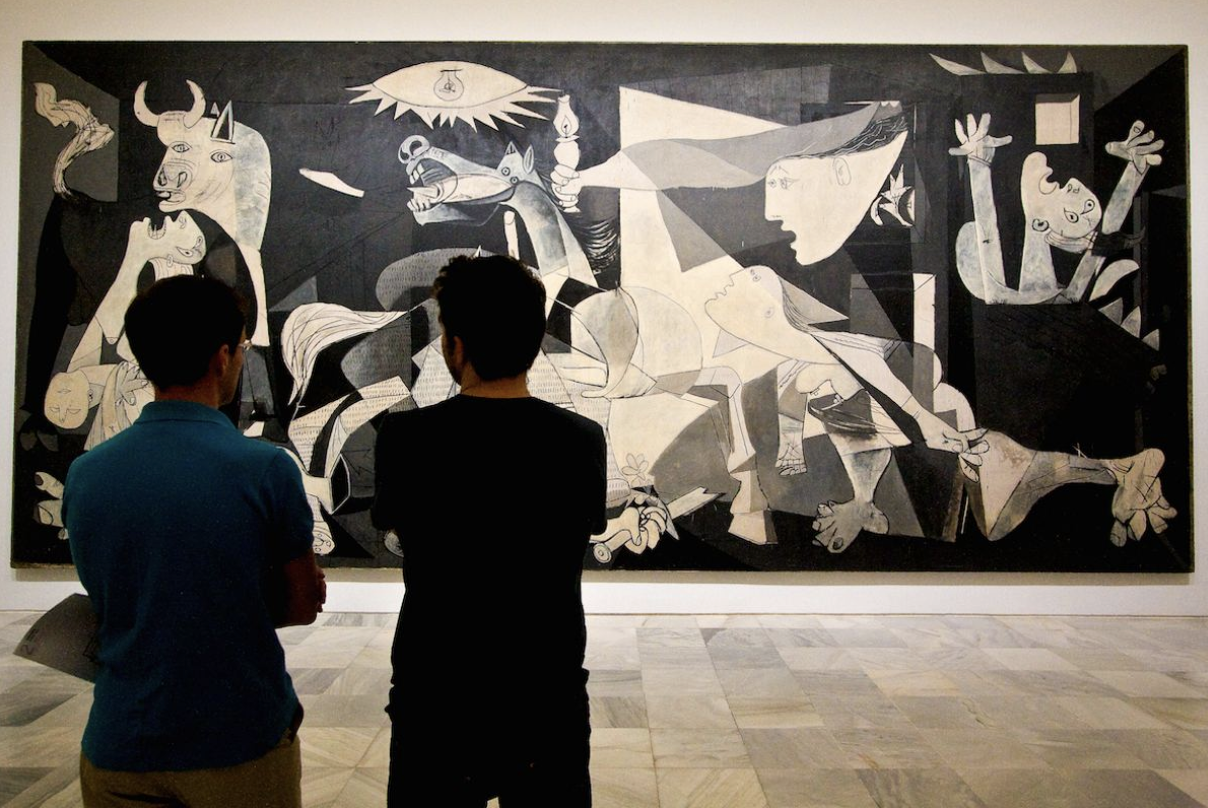

## Sample TASK with solution: plot Lasso/Ridge/MSE surfaces for Boston dataset
Repeat Section 8.2 (Plot MSE + Penalty Surfaces) using a bigger dataset, the Boston Dataset using the following two features.

- CRIM     per capita crime rate by town
- INDUS    proportion of non-retail business acres per town


**Hint**: start with a small subset of the data (e.g., 30 examples) and once things look ok, use all the training data.
Plot the MSE, penalty, LASSO and Ridge surfaces along (remember not to use a bias term here).


### Boston dataset
Boston dataset is extremely common in machine learning experiments thus it is embedded in sklearn.

In [29]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
# to plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

boston = load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [30]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
X.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [31]:
# extract two features from the dataframe
X2f = X[['CRIM', 'INDUS']]
X2f.head()

CRIM  INDUS
0  0.00632   2.31
1  0.02731   7.07
2  0.02729   7.07
3  0.03237   2.18
4  0.06905   2.18

#### Boston HousePrices in 3D :Find $\theta_1, \theta_2$ via SKLearn Linear Regression

Find $\theta_1, \theta_2$ via SKLearn Linear Regression so we can figure how to set up the contour plots later

In [32]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
# fit a two feature linear regression model
lr = LinearRegression()
sc = StandardScaler()
X2f = sc.fit_transform(X2f)

# model a two-feature regression plane
# no bias term!
lr = LinearRegression(fit_intercept=False)
lr.fit(X2f,y)
print("SKLearn Linear Regression: theta1, theta2", lr.coef_)


SKLearn Linear Regression: theta1, theta2 [-2.08914392 -3.59947486]


### Plot the GD path on the  MSE/LASSO/Ridge objective  functions

/Users/jamie/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


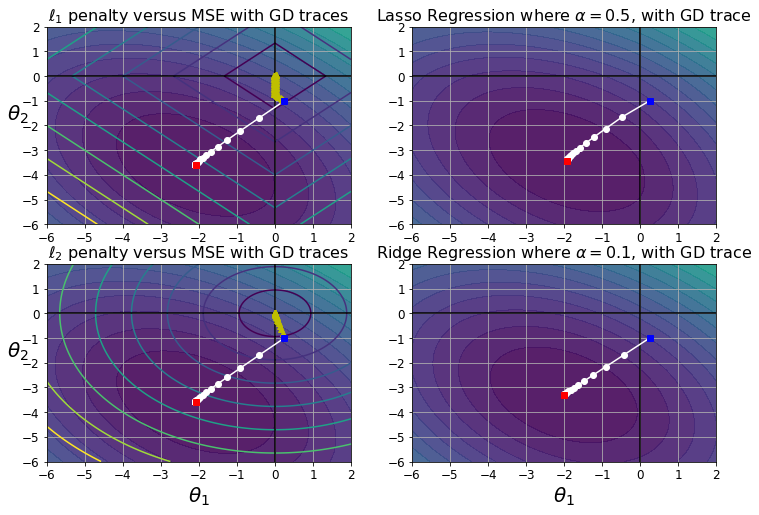

In [33]:
%matplotlib inline
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt

def plotBostonHousePrices_DataSet():
    # Training data examples (first 100 rows of Boston house prices)
    boston = load_boston()
    Xr = pd.DataFrame(boston.data, columns=boston.feature_names)[['CRIM', 'INDUS']]
    y = boston.target
    # extract two features from the dataframe
    trainDataCount = y.shape[0]
    Xr = np.array(Xr.iloc[:trainDataCount])  
    yr = y[:trainDataCount]
    sc = StandardScaler()
    Xr = sc.fit_transform(Xr)

    t1a, t1b, t2a, t2b = -6, 2, -6.0, 2.0
    
    startT1 = 0.25
    startT2 = -1
    t_init = np.array([startT1, startT2])  #initial values for theta [0.25, -1]

    plotMSE_Objective_functions(t1a, t1b, t2a, t2b, Xr, yr, t_init)
    
plotBostonHousePrices_DataSet()

#### Figure Explained: Regularization term versus data (MSE) loss term  VERSUS LASSO VERSUS Ridge

* Top Left figure: 
  * The background heatmap/filled contours (ellipses) represent an unregularized MSE cost function (i.e., when α = 0 for LASSO linear regression) for different values of $\theta_1$ and $\theta_2$.
  * The foreground  diamond shaped contours represent the $\ell_1$ penalty term  (i.e., when $α =\infty $  for LASSO linear regression)   
  * The white circles show the Batch Gradient Descent path with that MSE cost function. It begins at initial values for theta of [0.25, -1] (represented as the blue square) and finishes at the global minimum for the MSE objective function wrtt training set which is located at [-2.08914392 -3.59947486] (represented as the red square).
  * the yellow triangles show the Batch Gradient Descent path with that $\ell_1$ penalty cost function. It begins at initial values for theta of [0.25, -1] and finishes at the global minimum for the $\ell_1$ penalty  objective function wrtt training set which is located at [0. 0].
  
  
 * Top Right figure: LASSO Linear regression objective function with GD Trace. 
 * Lower Right figure: Ridge versus  MSE Linear regression objective functions with corresponding  GD Traces. 
 
 * Lower Right figure: Ridge Linear regression objective function with GD Trace. 


##  TASK: plot Lasso/Ridge/MSE surfaces for Boston dataset
Repeat Section 8.3 (Plot MSE + Penalty Surfaces) using  the Boston Dataset using the any two input features.

**Hint**: start with a small subset of the data (e.g., 30 examples) and once things look ok, use all the training data.
Plot the MSE, penalty, LASSO and Ridge surfaces along (remember not to use a bias term here).


# Selecting meaningful features for Regression

If we notice that a model performs much better on a training dataset than on the
test dataset, this observation is a strong indicator of overfitting. Overfitting means
the model fits the parameters too closely with regard to the particular observations in
the training dataset, but does not generalize well to new data, and we say the model
has a high variance. The reason for the overfitting is that our model is too complex
for the given training data. Common solutions to reduce the generalization error are
listed as follows:
* Collect more training data
* Introduce a penalty for complexity via regularization
* Choose a simpler model with fewer parameters
* Reduce the dimensionality of the data

In the following sections, we will look at common ways to reduce overfitting by regularization and
dimensionality reduction via feature selection, which leads to simpler models by
requiring fewer parameters to be fitted to the data.

## L1 and L2 regularization as penalties against model complexity

## A geometric interpretation of L2 regularization

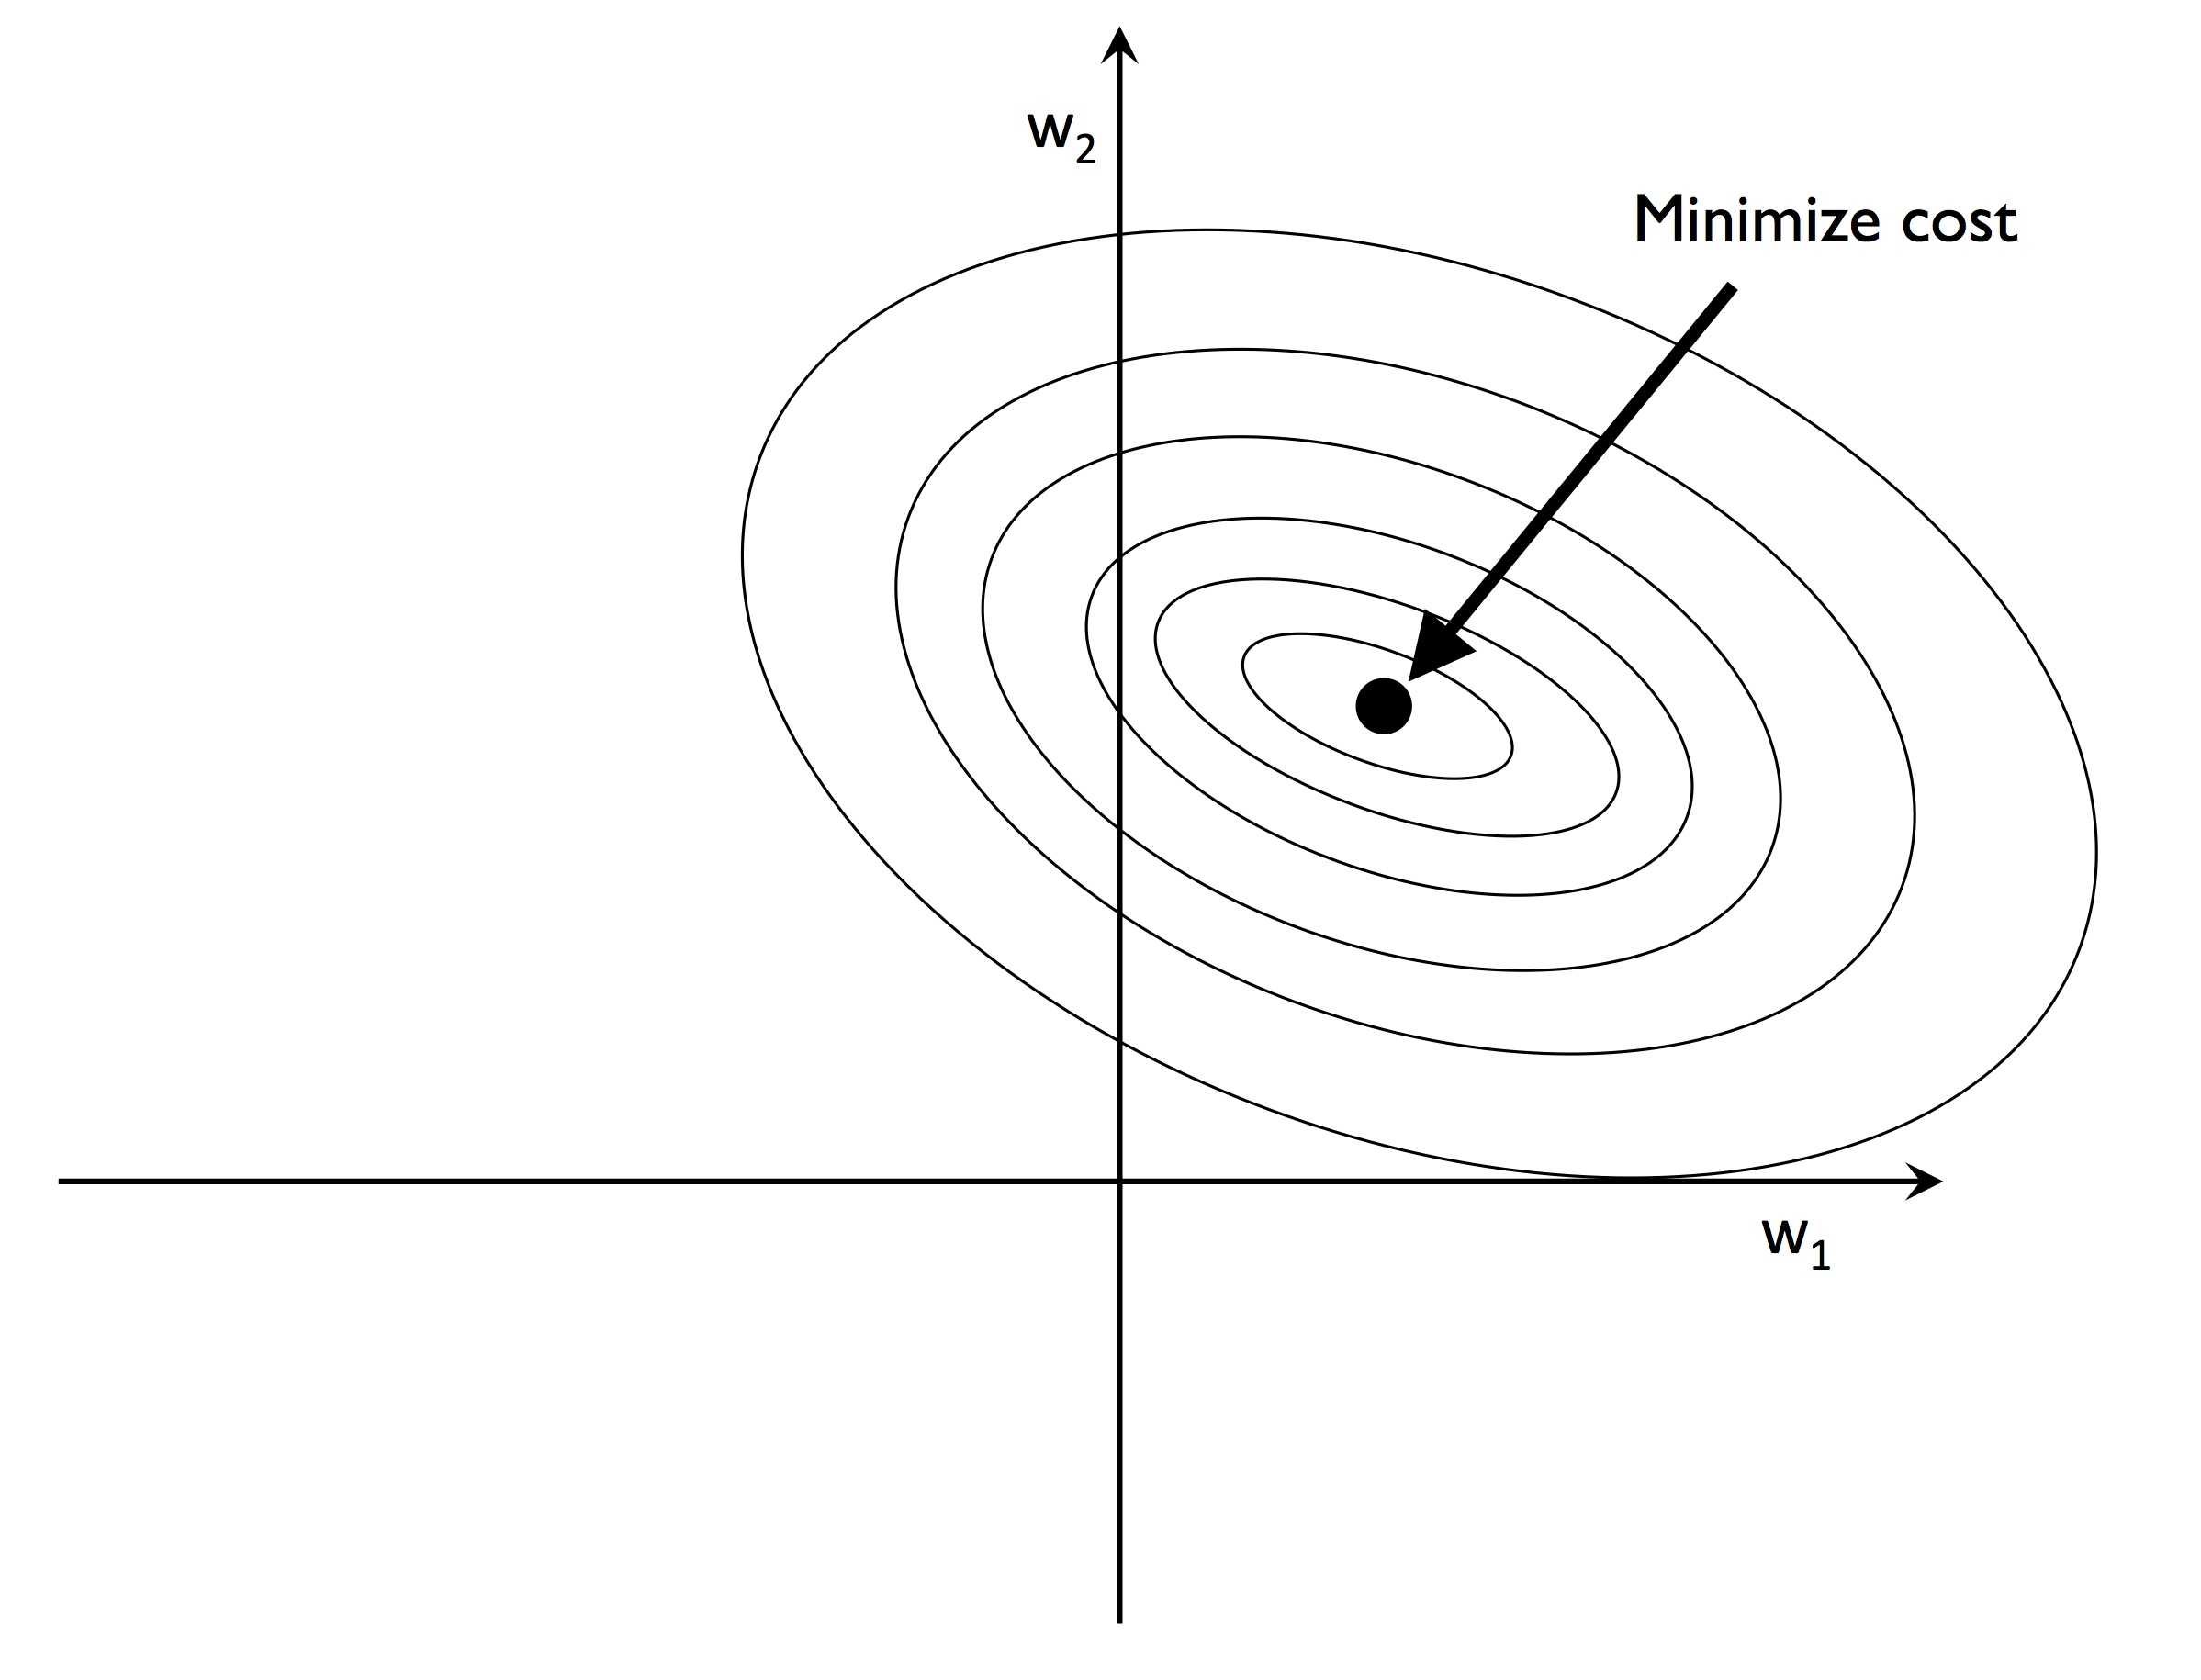

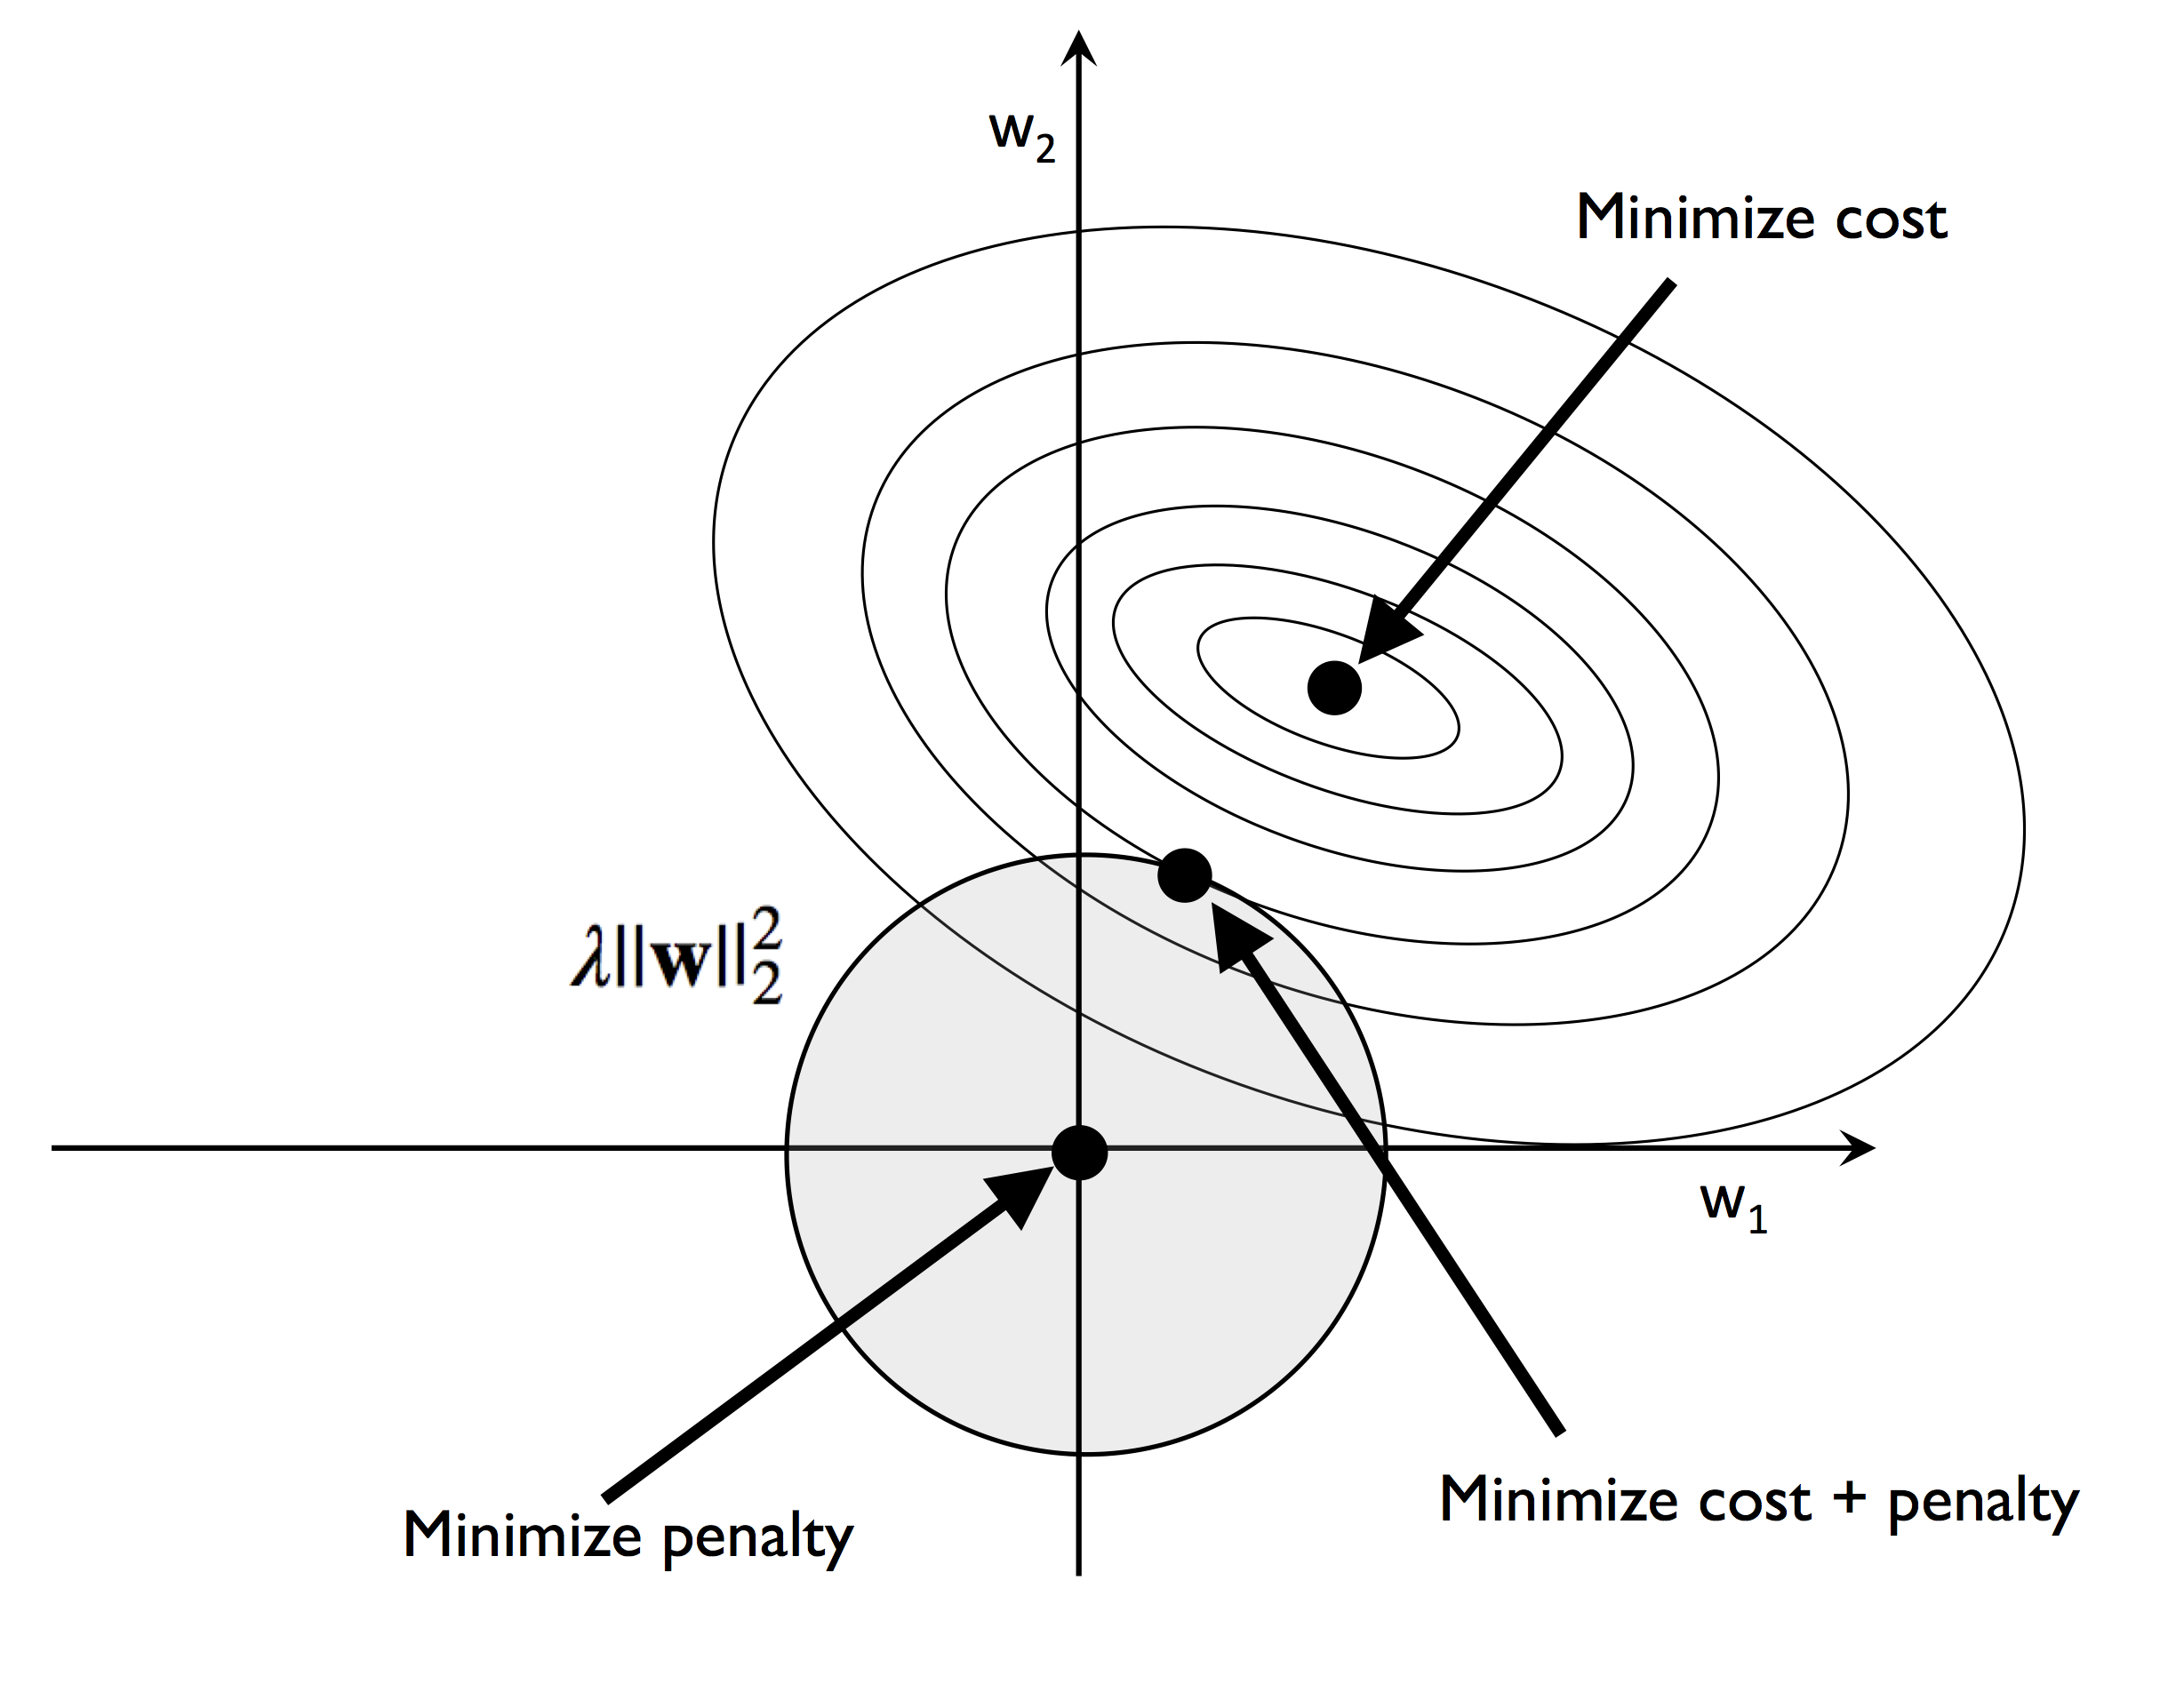

## Sparse solutions with L1-regularization

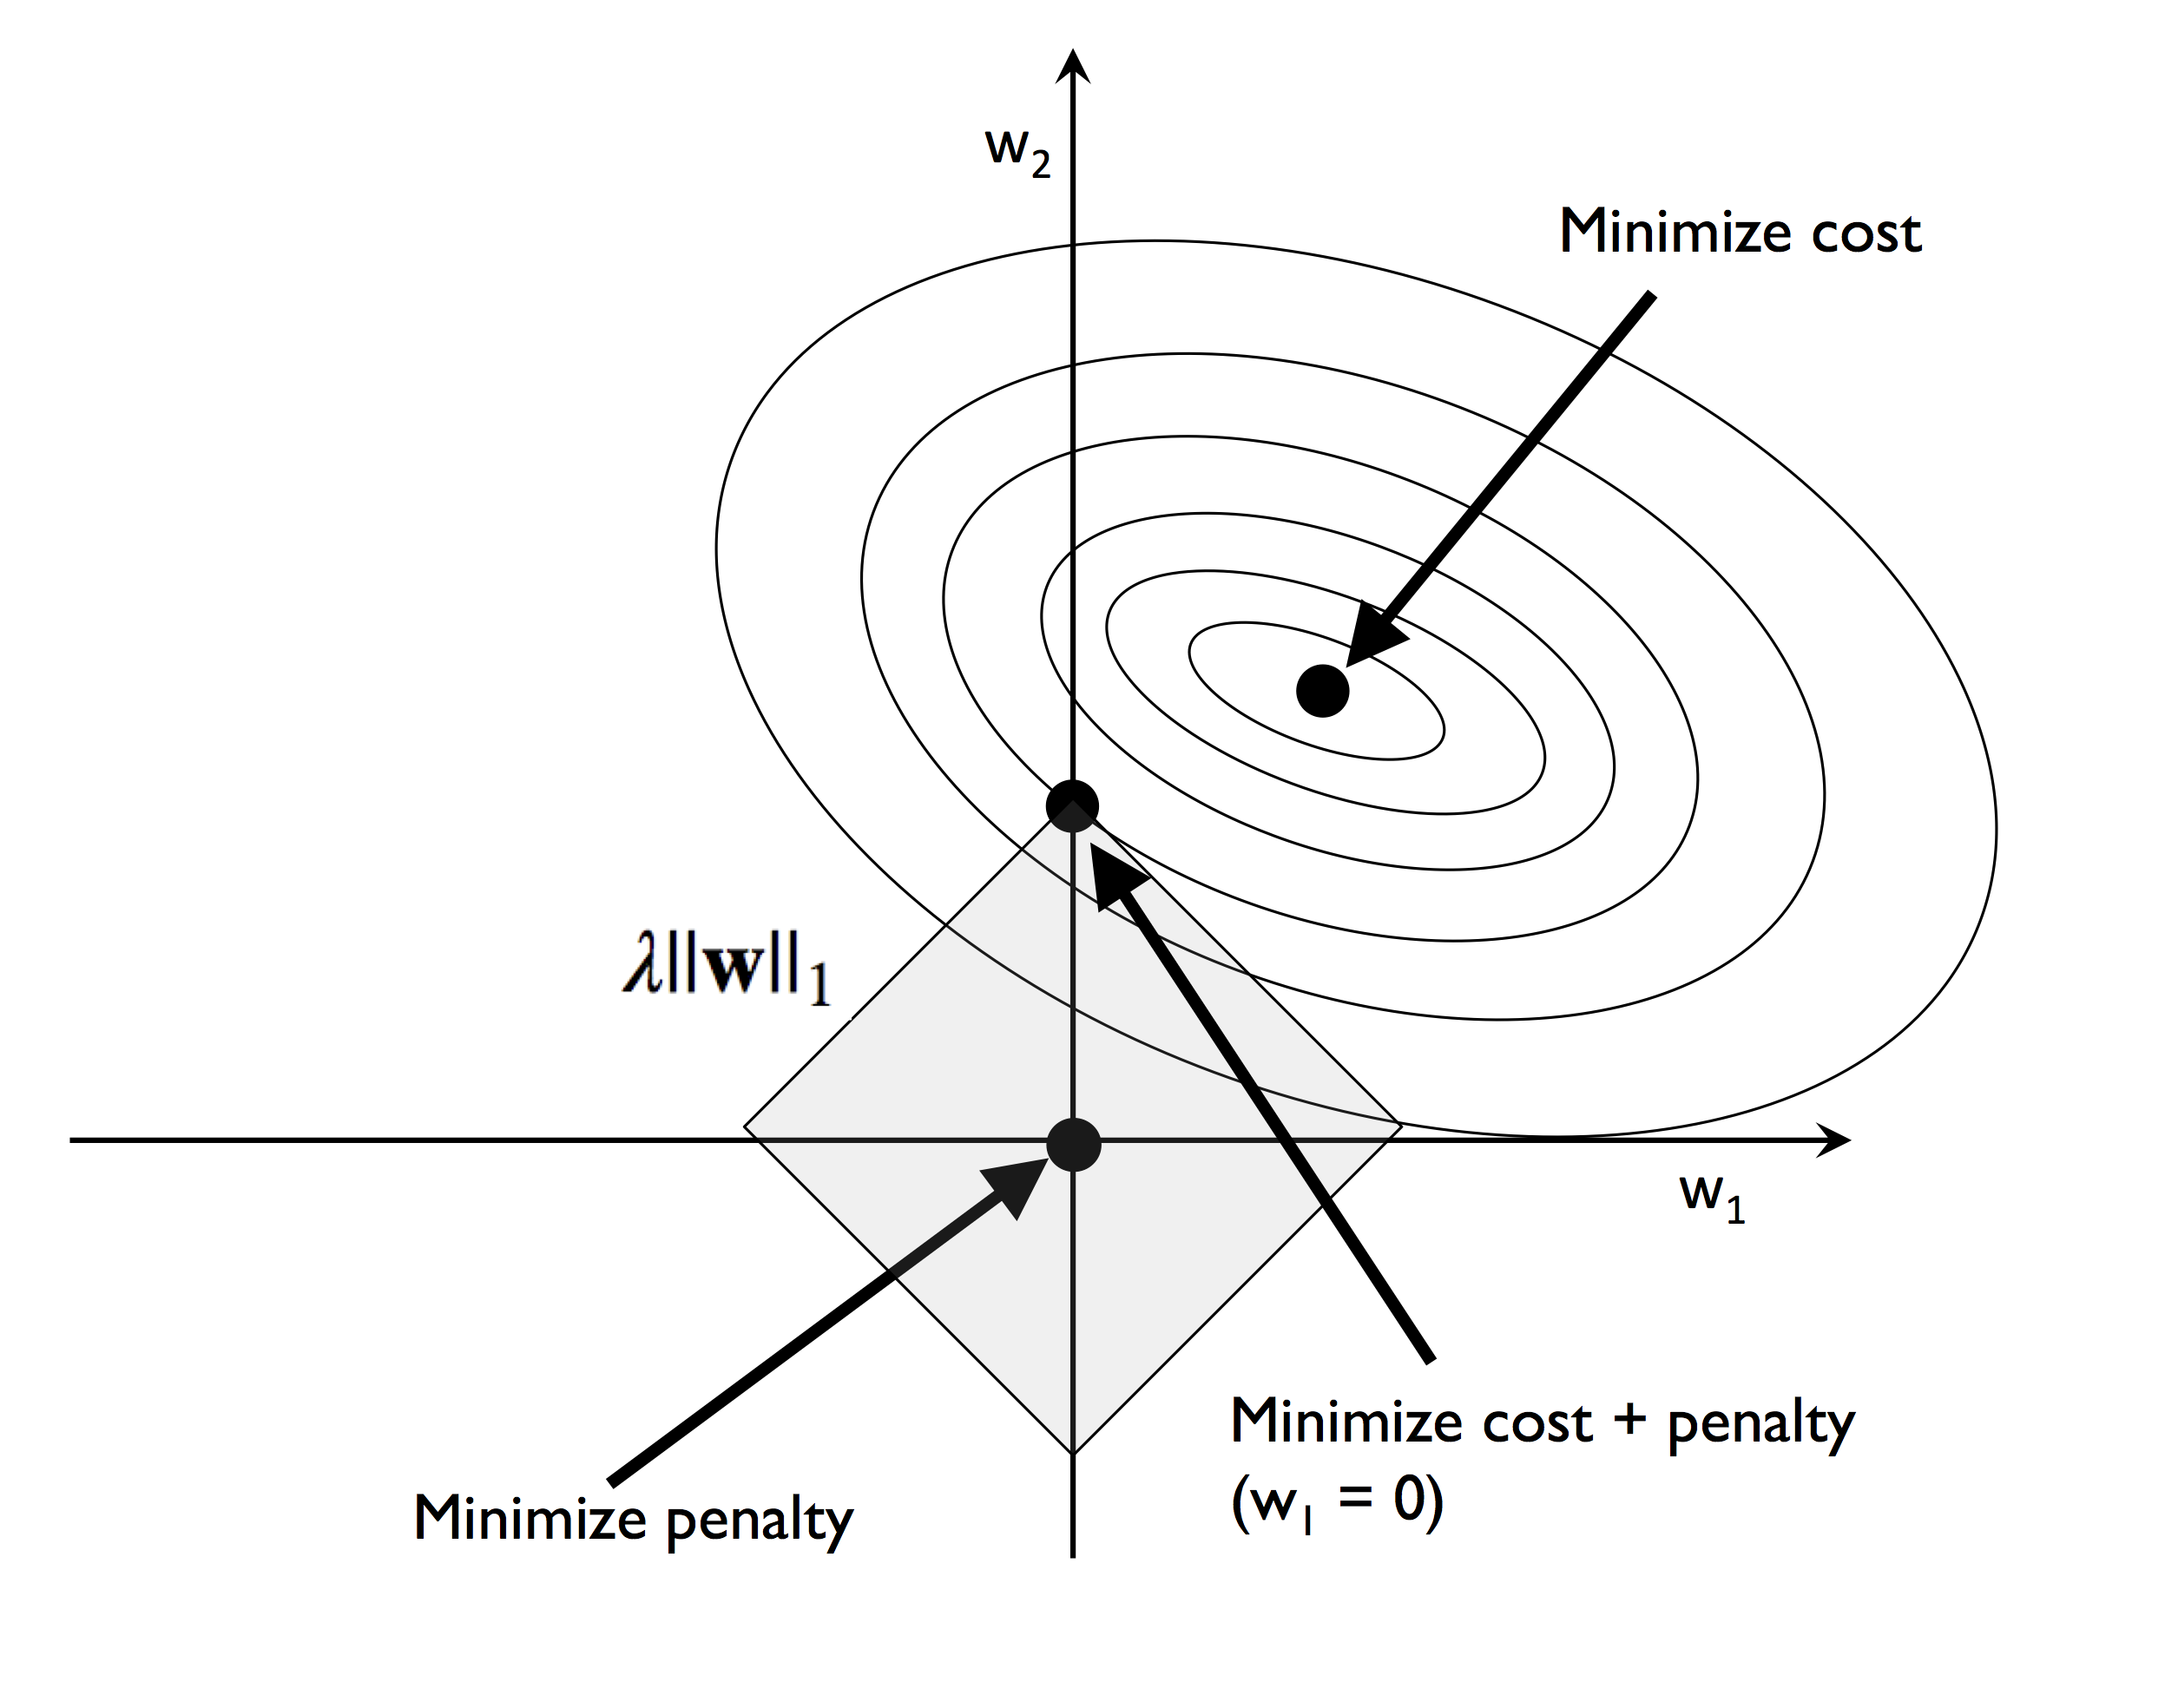

For regularized models in scikit-learn that support L1 regularization, we can simply set the `penalty` parameter to `'l1'` to obtain a sparse solution:

### LASSO linear regression for the Boston Data for different values of $\alpha$

In [2]:
from sklearn.linear_model import SGDRegressor
SGDRegressor(penalty='l1')

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l1',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

Applied to the standardized boston dataset ...

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
lr = SGDRegressor(penalty='l1', alpha=.5)
lr.fit(X_train_std, y_train)
print('Train R\u00b2:', lr.score(X_train_std, y_train))
print('Test R\u00b2:', lr.score(X_test_std, y_test))

Train R²: 0.709394594725
Test R²: 0.616548619613


/Users/jamie/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [7]:
lr.intercept_

array([ 22.36592852])

In [8]:
np.set_printoptions(8)

In [9]:
lr.coef_[lr.coef_!=0].shape

(9,)

In [10]:
lr.coef_

array([-0.42617539,  0.        ,  0.        ,  0.49623903, -0.07884972,
        3.50115209,  0.        , -0.23806234,  0.        , -0.07218811,
       -1.48478637,  0.81574309, -3.26649267])

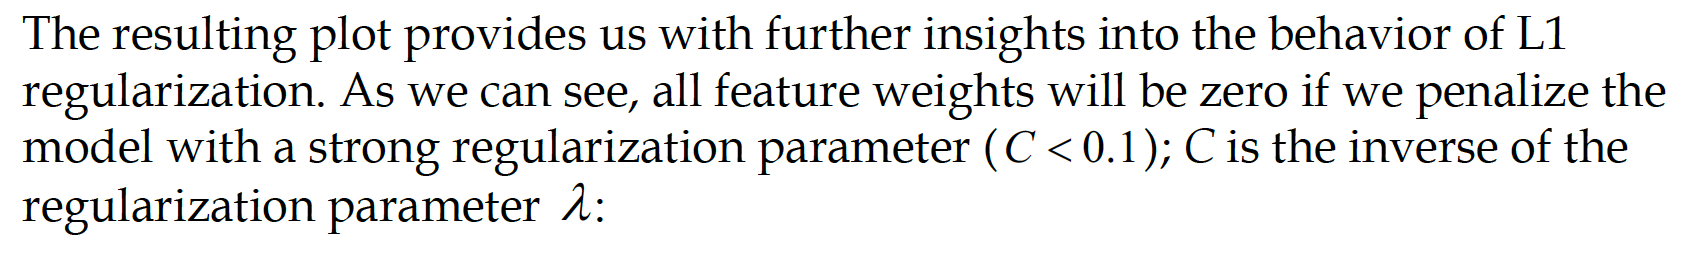

/Users/jamie/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


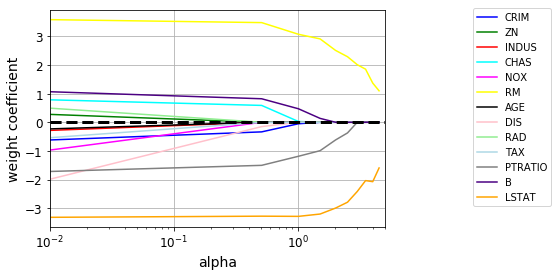

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

fig = plt.figure()
ax = plt.subplot(111)
df_boston = pd.DataFrame(boston.data,columns=boston.feature_names)

colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [],[]
for a in np.arange(.01, 5, .5):
    lr = SGDRegressor(penalty='l1', alpha=a)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_)
    params.append(a)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_boston.columns[column],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-2), 5])
plt.ylabel('weight coefficient')
plt.xlabel('alpha')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
#plt.savefig('images/04_07.png', dpi=300, 
#            bbox_inches='tight', pad_inches=0.2)
plt.show()

## Sequential feature selection algorithms for linear regression

An alternative way to reduce the complexity of the model and avoid overfitting
is dimensionality reduction via feature selection. 

Here we present a homegrown version of the Sequential Backward Selection algorithm which begins with all the features.

### TASK: Sequential feature selection algorithms: Sequential Backward Selection

An alternative way to reduce the complexity of the model and avoid overfitting
is dimensionality reduction via feature selection, which is especially useful for
unregularized models. There are two main categories of dimensionality reduction
techniques: feature selection and feature extraction. Via feature selection, we select
a subset of the original features, whereas in feature extraction, we derive information
from the feature set to construct a new feature subspace.

Sequential feature selection algorithms are a family of greedy search algorithms
that are used to reduce an initial d-dimensional feature space to a k-dimensional
feature subspace where `k<d`. The motivation behind feature selection algorithms is
to automatically select a subset of features that are most relevant to the problem, to
improve computational efficiency or reduce the generalization error of the model by
removing irrelevant features or noise, which can be useful for algorithms that don't
support regularization.

A classic sequential feature selection algorithm is Sequential Backward Selection
(SBS), which aims to reduce the dimensionality of the initial feature subspace with
a minimum decay in performance of the classifier to improve upon computational
efficiency. In certain cases, SBS can even improve the predictive power of the model
if a model suffers from overfitting.


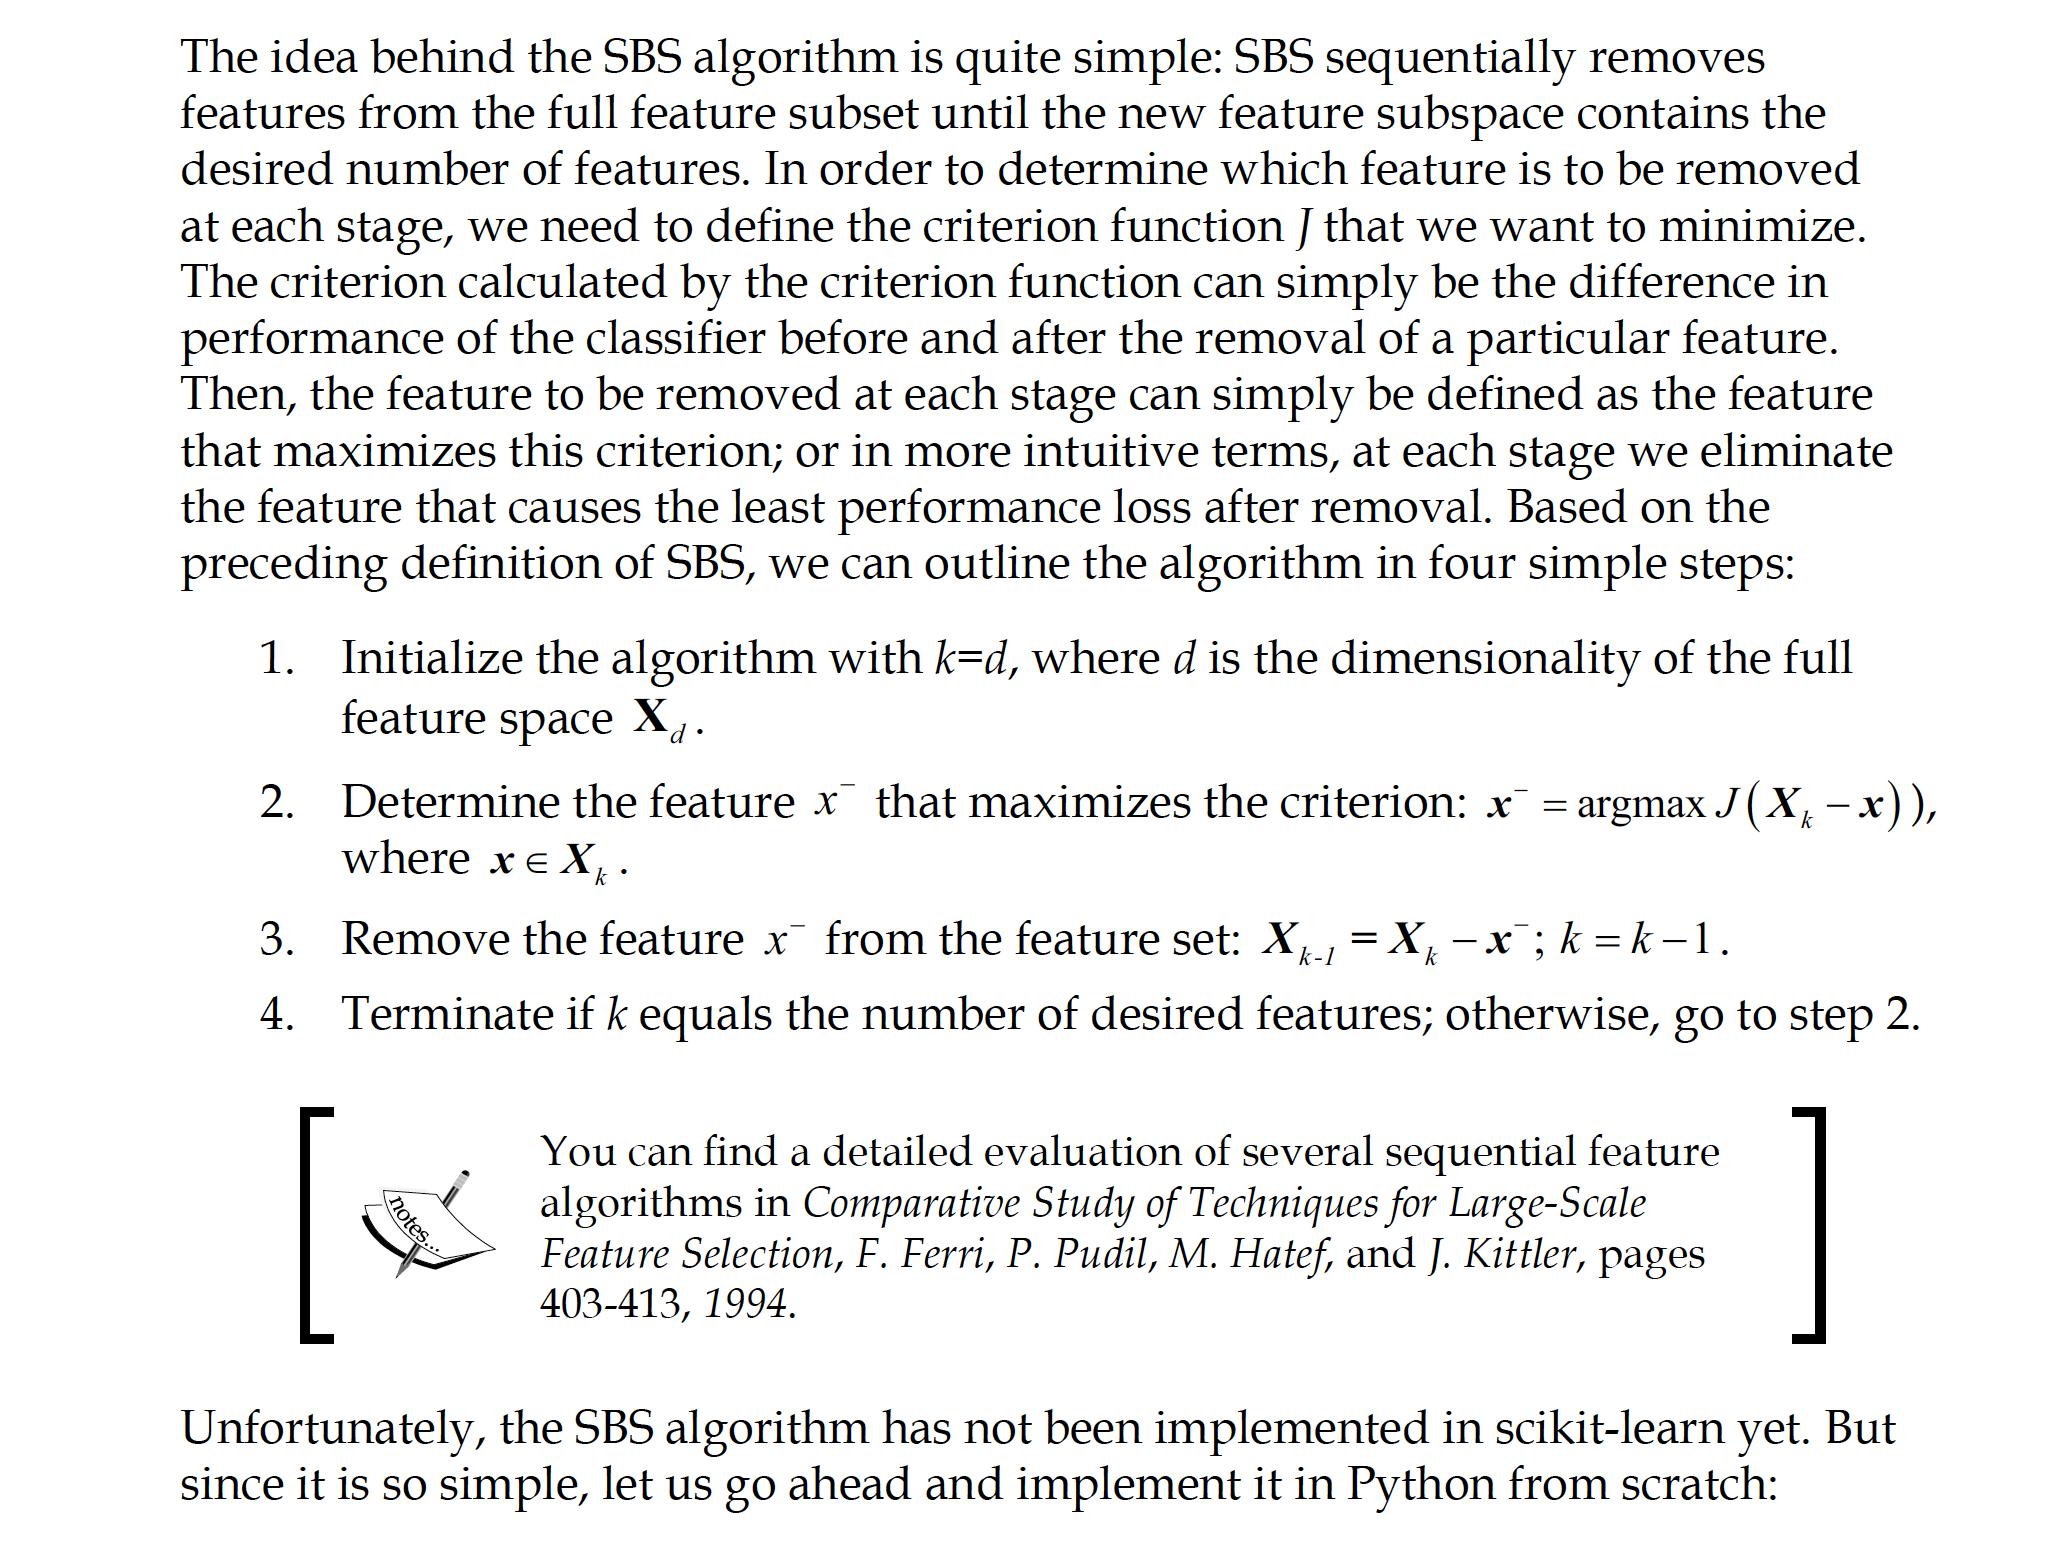

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [15]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        #split training data into train and validation subsets
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []
            # look at all combinations of dim-1 features 
            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        ## TODO  please complete!
        # using crossfold validation select the single best model from among all selected subsets
        # using cross-validated performance utility
        
        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

### Boston house prices: Sequential Backward Selection  for regression


In [16]:
from sklearn.linear_model import SGDRegressor
SGDRegressor(penalty='l1')

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l1',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

Applied to the Boston dataset ...

In [18]:
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

### Performance utility measures for linear regression

The `sklearn.metrics` module implements several loss, score, and utility functions to measure regression performance. Some of those have been enhanced to handle the multioutput case: mean_squared_error, mean_absolute_error, explained_variance_score and r2_score.


The explained_variance_score computes the explained variance regression score. This is a performance utility measures. Bigger values are preferred and can to better model performance on unseen test data.

If $\hat{y}$ is the estimated target output, $y$ the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

$$ \texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}} $$

The best possible score is 1.0, lower values are worse.

/Users/jamie/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


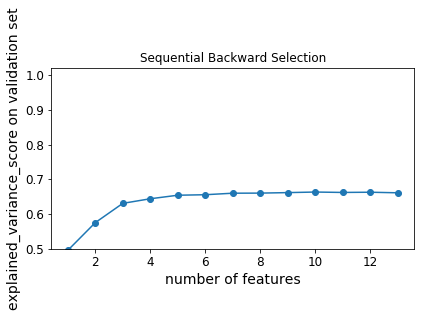

In [21]:
#from sklearn.metrics import neg_mean_squared_error
from sklearn.metrics import explained_variance_score

#neg_mean_squared_error
lr = SGDRegressor(penalty='l1', alpha=.5)

# selecting features
sbs = SBS(lr, k_features=1, scoring=explained_variance_score)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

#plot places the points on the graph using the number of features (no need to sort!)
plt.plot(k_feat, sbs.scores_, marker='o')  
plt.ylim([0.5, 1.02])
plt.title("Sequential Backward Selection")
plt.ylabel('explained_variance_score on validation set')
plt.xlabel(r'number of features')
plt.grid()
plt.tight_layout()
plt.show()


As we can see in the following figure, the performance  of the linear regression model improved on
the validation dataset as we increased the number of features, the subset of the best 11 featues doing best (according to the validation set).


#### show the feature subsets that were selected in backward elimination fashion 

In [22]:
list(zip( np.arange(0, len(sbs.scores_)), k_feat, np.round(sbs.scores_, 3), sbs.subsets_)  )

[(0, 13, 0.66200000000000003, (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)),
 (1, 12, 0.66300000000000003, (0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12)),
 (2, 11, 0.66300000000000003, (0, 1, 3, 4, 5, 6, 7, 8, 10, 11, 12)),
 (3, 10, 0.66400000000000003, (0, 1, 3, 4, 5, 6, 8, 10, 11, 12)),
 (4, 9, 0.66200000000000003, (0, 1, 3, 4, 5, 6, 10, 11, 12)),
 (5, 8, 0.66100000000000003, (1, 3, 4, 5, 6, 10, 11, 12)),
 (6, 7, 0.66000000000000003, (3, 4, 5, 6, 10, 11, 12)),
 (7, 6, 0.65600000000000003, (3, 4, 5, 10, 11, 12)),
 (8, 5, 0.65500000000000003, (3, 5, 10, 11, 12)),
 (9, 4, 0.64400000000000002, (5, 10, 11, 12)),
 (10, 3, 0.63100000000000001, (5, 10, 12)),
 (11, 2, 0.57599999999999996, (5, 12)),
 (12, 1, 0.497, (12,))]

In [50]:
best_subset = list(sbs.subsets_[2])
#print(df_wine.columns[1:][k3])
best_subset

[0, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12]

In [52]:
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.706435731382
Test accuracy: 0.61648891245


In [51]:
lr.fit(X_train_std[:, best_subset], y_train)
print('Training accuracy:', lr.score(X_train_std[:, best_subset], y_train))
print('Test accuracy:', lr.score(X_test_std[:, best_subset], y_test))

Training accuracy: 0.700397753634
Test accuracy: 0.618918065734


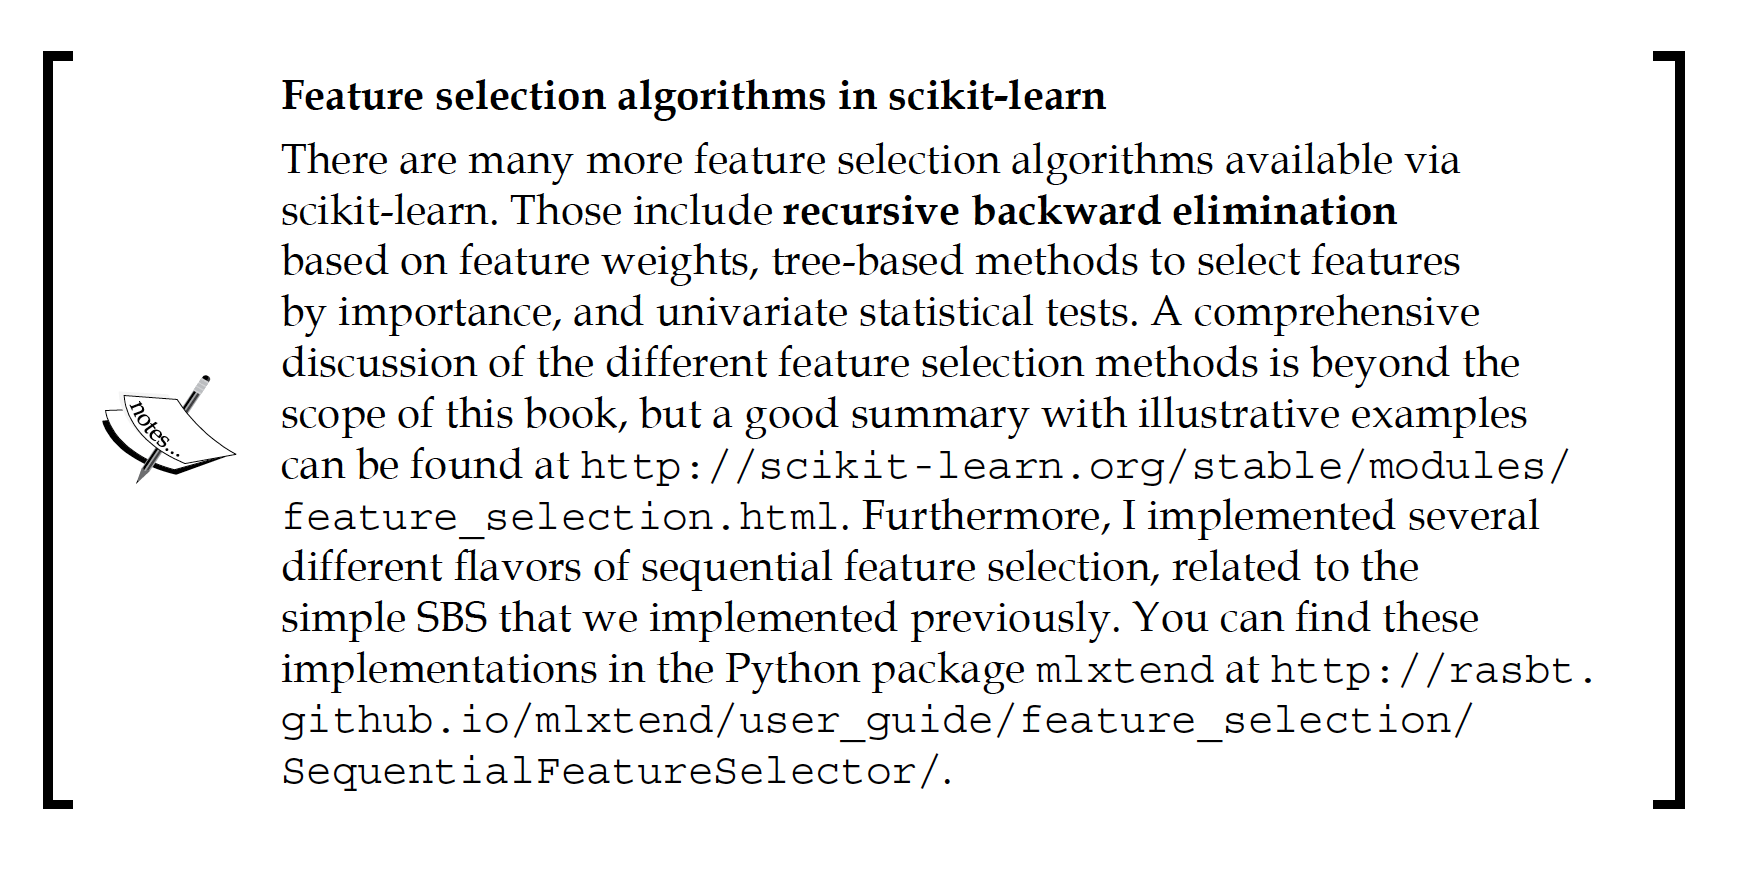

# Selecting meaningful features for Classification

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_wine
wine = load_wine()
X = wine.data
y = wine.target
df_wine = pd.DataFrame(wine.data,columns=wine.feature_names)
df_wine.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [78]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [79]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score


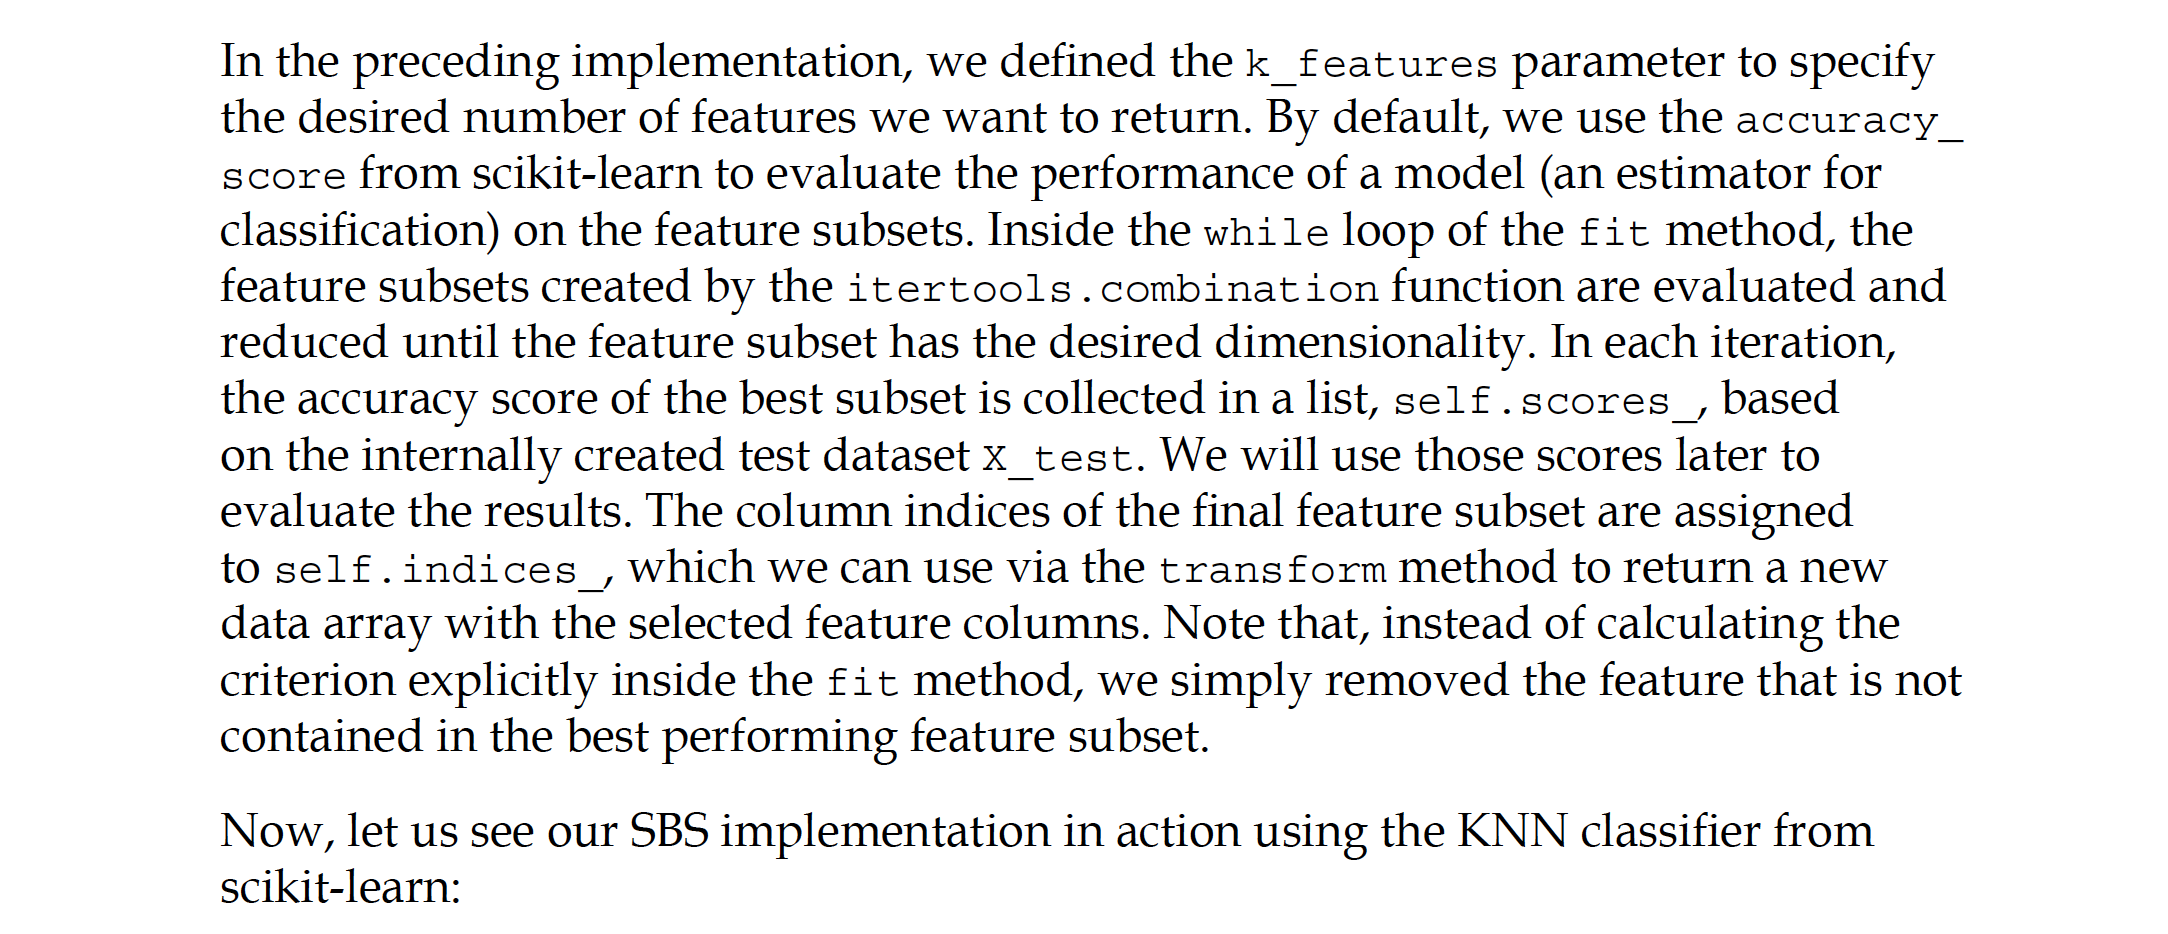

In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('images/04_08.png', dpi=300)
plt.show()

NameError: name 'SBS' is not defined

As we can see in the following figure, the accuracy of the KNN classifier improved on
the validation dataset as we reduced the number of features, which is likely due to a
decrease in the curse of dimensionality that we discussed in the context of the KNN
algorithm previously, A Tour of Machine Learning Classifiers Using scikit-learn. Also,
we can see in the following plot that the classifier achieved 100 percent accuracy for
k={3, 7, 8, 9, 10, 11, 12}:

In [81]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['malic_acid', 'alcalinity_of_ash', 'nonflavanoid_phenols'], dtype='object')


In [82]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.985915492958
Test accuracy: 0.944444444444


In [83]:
knn.fit(X_train_std[:, k3], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k3], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k3], y_test))

Training accuracy: 0.957746478873
Test accuracy: 0.944444444444


<br>
<br>
<img src="attachment:image.png" alt="Drawing" style="width: =500px;"/>

# Assessing feature importance with Random Forests

 1) color_intensity                0.164503
 2) flavanoids                     0.162665
 3) proline                        0.152335
 4) od280/od315_of_diluted_wines   0.142162
 5) alcohol                        0.116726
 6) hue                            0.068542
 7) total_phenols                  0.051192
 8) alcalinity_of_ash              0.040230
 9) malic_acid                     0.028128
10) magnesium                      0.025703
11) proanthocyanins                0.020574
12) ash                            0.016314
13) nonflavanoid_phenols           0.010925


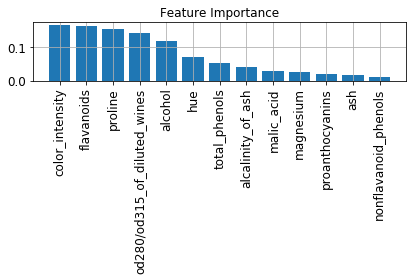

In [84]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()

In [85]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of samples that meet this criterion:', 
      X_selected.shape[0])

Number of samples that meet this criterion: 142


Now, let's print the features that met the threshold criterion for feature selection that we set earlier (note that this code snippet does not appear in the actual book but was added to this notebook later for illustrative purposes):

In [86]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) color_intensity                0.164503
 2) flavanoids                     0.162665
 3) proline                        0.152335
 4) od280/od315_of_diluted_wines   0.142162
 5) alcohol                        0.116726


# References

Some of the material in this has been adopted from  the following:

* Chapter 4, Pages 123-139 (Selecting meaningful Features) in the following book provides a great parallel to this notebook (especially for the second half of this notebook.
  * Python Machine Learning 2nd Edition* by [Sebastian Raschka](https://sebastianraschka.com), Packt Publishing Ltd. 2017
* Chapter 6, Linear Model Selection and Regularization. This chapter provides mathematical details of  L1 and L2 regularization 
  * An Introduction to Statistical Learning with Applications in R (ISLR), Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani, 2013 Springer,  available [here](https://www.dropbox.com/s/ql576yk3gvser30/ISLR%20Seventh%20Printing.pdf?dl=0). 
* Chapter 4: Training models,  Hands-On Machine Learning with Scikit-Learn and TensorFlow Concepts, Tools, and Techniques to Build Intelligent Systems, Aurélien Géron, O'Reilly Media, 2017.




<br>
<br>